In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline

In [2]:
os.chdir(r'C:\Users\User\Desktop\New folder\Data')
directoryPath = os.getcwd()

In [3]:
all_sub_path = []
for path,subdirectory, files in os.walk(directoryPath):
    for subdir in subdirectory:
        sub_path = os.path.join(directoryPath, subdir)
        all_sub_path.append(sub_path)

In [4]:
concat_data = pd.DataFrame();
for sub_dir in all_sub_path:
    for path,subdir, filenames in os.walk(sub_dir):
        for file in filenames:
            file_name = os.path.join(sub_dir, file)
            X = pd.read_csv(file_name, low_memory=False, parse_dates=True)
            concat_data = pd.concat([concat_data,X], axis = 0)

In [5]:
df = concat_data
df.head()

device      timestamp column_cat         column_name      value datatype  \
0  WTG001  1574503217149       stat  time_turbineOP_hrs  1574.4083    Float   
1  WTG001  1574503217169      pitch              bus_v3      342.4    Float   
2  WTG002  1574503217193       stat              energy  1906441.0    Float   
3  WTG002  1574503217211      pitch              bus_v2      338.8    Float   
4  WTG001  1574503217281       stat     time_gridOK_hrs  2412.8584    Float   

  grp_edgnodid                TimeStamp  
0    Test_Site  2019-11-23 10:00:17.149  
1    Test_Site  2019-11-23 10:00:17.169  
2    Test_Site  2019-11-23 10:00:17.193  
3    Test_Site  2019-11-23 10:00:17.211  
4    Test_Site  2019-11-23 10:00:17.281

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506514 entries, 0 to 578
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   device        506514 non-null  object
 1   timestamp     506514 non-null  int64 
 2   column_cat    506514 non-null  object
 3   column_name   506514 non-null  object
 4   value         505871 non-null  object
 5   datatype      506514 non-null  object
 6   grp_edgnodid  506514 non-null  object
 7   TimeStamp     506514 non-null  object
dtypes: int64(1), object(7)
memory usage: 34.8+ MB


In [7]:
len(df.column_name.unique())

78

In [8]:
df.TimeStamp.astype('datetime64[ns]')
df.index = pd.to_datetime(df['TimeStamp'])
df = df.drop('TimeStamp',axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506514 entries, 2019-11-23 10:00:17.149000 to 2019-11-23 20:00:34.511000
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   device        506514 non-null  object
 1   timestamp     506514 non-null  int64 
 2   column_cat    506514 non-null  object
 3   column_name   506514 non-null  object
 4   value         505871 non-null  object
 5   datatype      506514 non-null  object
 6   grp_edgnodid  506514 non-null  object
dtypes: int64(1), object(6)
memory usage: 30.9+ MB


The column VALUE has some missing values

In [9]:
###"Checking the missing values"##
bool_series = pd.isnull(df['value'])
data=df[bool_series]
data.head()

device      timestamp column_cat   column_name value  \
TimeStamp                                                                       
2019-11-23 10:16:35.865  WTG003  1574504195865     alarms  alarm_string   NaN   
2019-11-23 10:16:38.887  WTG003  1574504198887     alarms  alarm_string   NaN   
2019-11-23 12:06:03.889  WTG003  1574510763889     alarms  alarm_string   NaN   
2019-11-23 12:06:12.304  WTG003  1574510772304     alarms  alarm_string   NaN   
2019-11-23 12:11:37.646  WTG003  1574511097646     alarms  alarm_string   NaN   

                        datatype grp_edgnodid  
TimeStamp                                      
2019-11-23 10:16:35.865   String    Test_Site  
2019-11-23 10:16:38.887   String    Test_Site  
2019-11-23 12:06:03.889   String    Test_Site  
2019-11-23 12:06:12.304   String    Test_Site  
2019-11-23 12:11:37.646   String    Test_Site

In [10]:
data.column_name.unique()

array(['alarm_string'], dtype=object)

In [11]:
data.datatype.unique()

array(['String'], dtype=object)

The data is missing only for the column_name "alarm_string"

In [12]:
##"Advance check"##
temp = df[df.column_name == 'alarm_string']
print("The total size of the column_name == 'alarm_string' is  " + str(len(temp)))
print("The number of data missing for the column_name == 'alarm_string' is  " + str(len(data)))

The total size of the column_name == 'alarm_string' is  1692
The number of data missing for the column_name == 'alarm_string' is  643


38 % of the data are missing for the column_name == 'alarm_string'
As this is significant number, we can't drop the missing values as we might lose lot of informations.
Idea: Filling the missing data with method='pad'. The reason behind doing this is it maintains almost the same proportion between the different alarm_string's values (As seen in non-missing datsets).

In [13]:
temp['value'].unique()

array(['Bottom UPS battery end of lifetime', 'Disabled conditions', nan,
       'Flexislip warning asymmetric rotor current too high'],
      dtype=object)

In [14]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1692 entries, 2019-11-23 10:01:07.967000 to 2019-11-23 20:00:28.778000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device        1692 non-null   object
 1   timestamp     1692 non-null   int64 
 2   column_cat    1692 non-null   object
 3   column_name   1692 non-null   object
 4   value         1049 non-null   object
 5   datatype      1692 non-null   object
 6   grp_edgnodid  1692 non-null   object
dtypes: int64(1), object(6)
memory usage: 105.8+ KB


In [15]:
##Filling the missing value
temp.value.fillna(method = 'pad',inplace=True)
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1692 entries, 2019-11-23 10:01:07.967000 to 2019-11-23 20:00:28.778000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device        1692 non-null   object
 1   timestamp     1692 non-null   int64 
 2   column_cat    1692 non-null   object
 3   column_name   1692 non-null   object
 4   value         1692 non-null   object
 5   datatype      1692 non-null   object
 6   grp_edgnodid  1692 non-null   object
dtypes: int64(1), object(6)
memory usage: 105.8+ KB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
df.device.unique()

array(['WTG001', 'WTG002', 'WTG003', 'site'], dtype=object)

In [17]:
df.datatype.unique()

array(['Float', 'Int64', 'Int32', 'String'], dtype=object)

In [18]:
df[df.device == 'site'].column_name.unique()

array(['circuit_total_power'], dtype=object)

In [19]:
filter_data1 = df[df.device == 'GTW001']

In [20]:
import datetime
import matplotlib
def datetime_to_time(y):
    j = [];
    for i in y:
        try:
            j.append(str(datetime.datetime.strptime(str(i),'%Y-%m-%d %H:%M:%S.%f').time()))
        except:
            temp = str(i) + '.00000'
            j.append(str(datetime.datetime.strptime(temp,'%Y-%m-%d %H:%M:%S.%f').time()))
    return j

In [21]:
##Function to plot data of dataype float,int64,int32
def Plotting_raw_data(data,device):
    filter_data = df[df.device == device]
    columns = filter_data.column_name.unique().tolist()
    a = 1
    for col in columns:
        plt.figure(a,figsize = (6,6))
        if filter_data[filter_data.column_name == col].datatype.unique() != 'String':
            y = filter_data[filter_data.column_name == col].value.astype(float)
            plt.scatter(y.index,y)
            plt.xticks(rotation=55)
            plt.xlabel('Time (in hours)',fontsize=14)
            plt.ylabel(str(col),fontsize=14)
            a=a+1   
    print('Number of Figures: '+str(a)) 
    plt.show()

<ipython-input-21-ca4f92bf0881>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(a,figsize = (6,6))


Number of Figures: 77


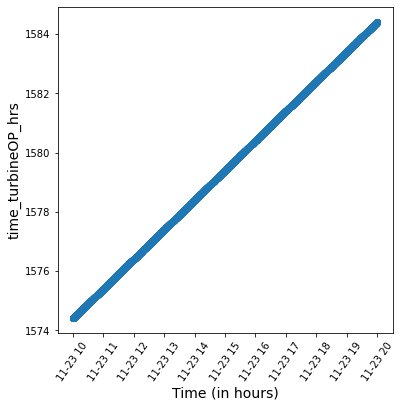

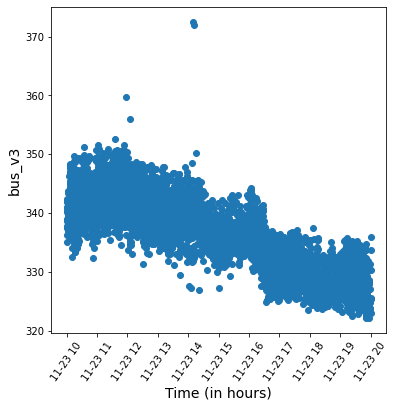

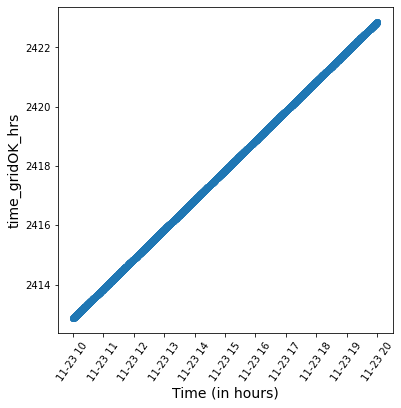

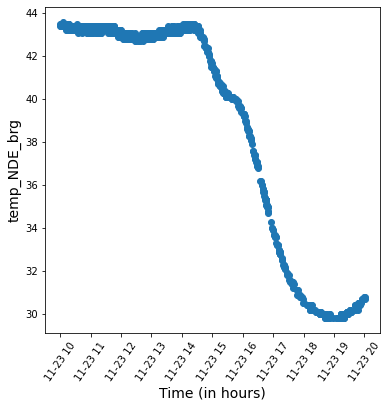

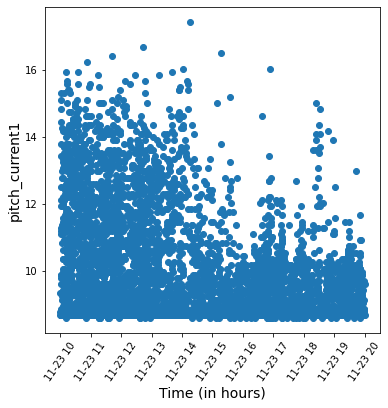

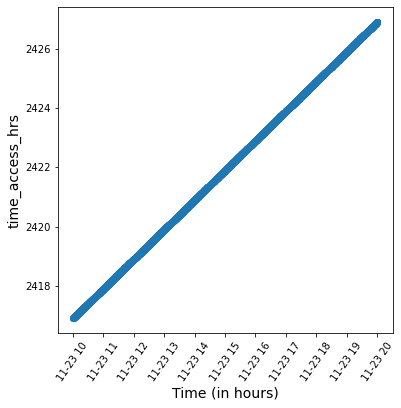

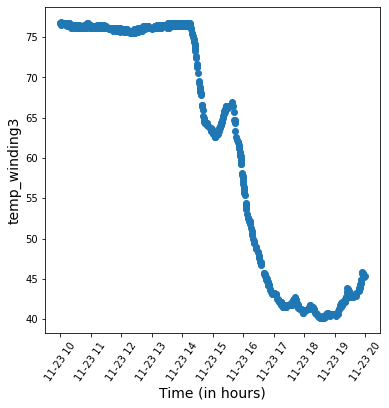

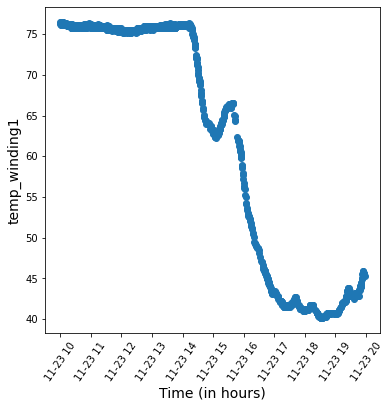

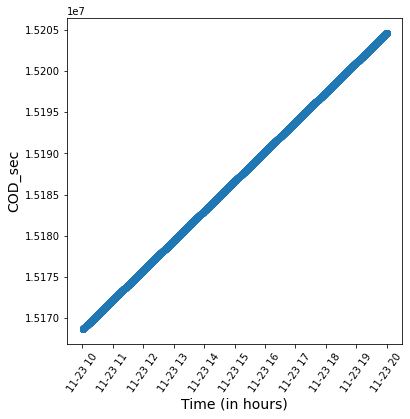

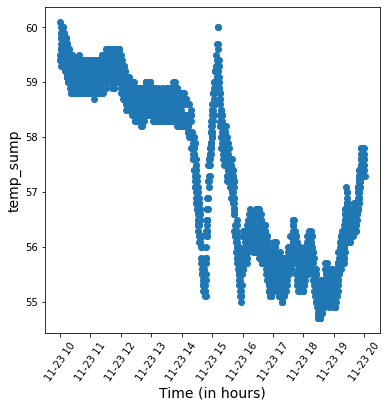

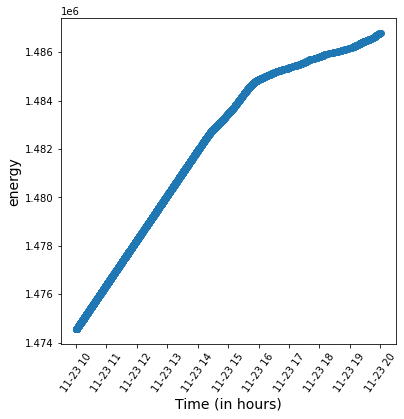

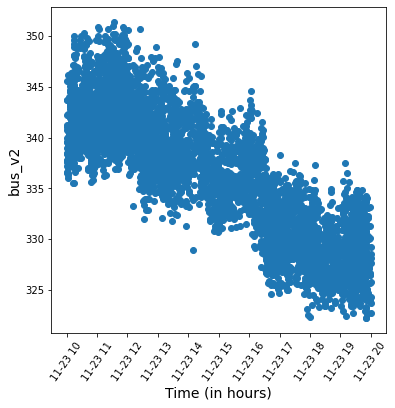

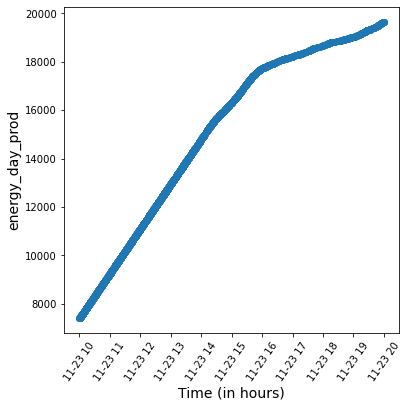

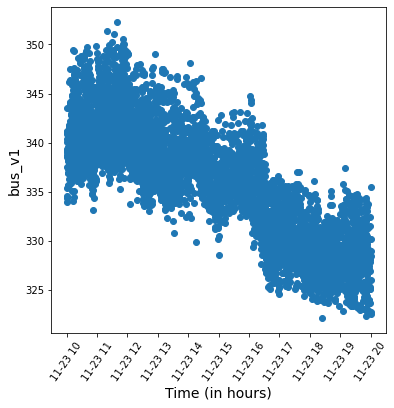

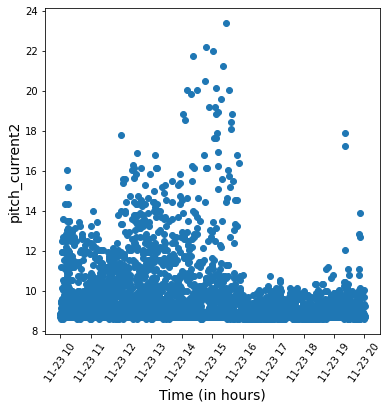

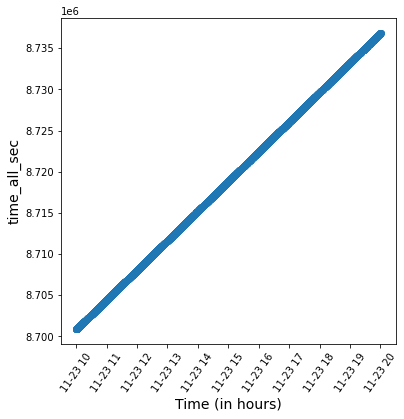

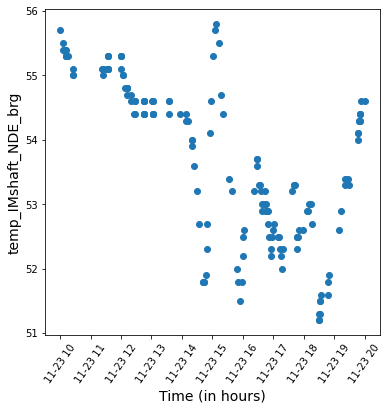

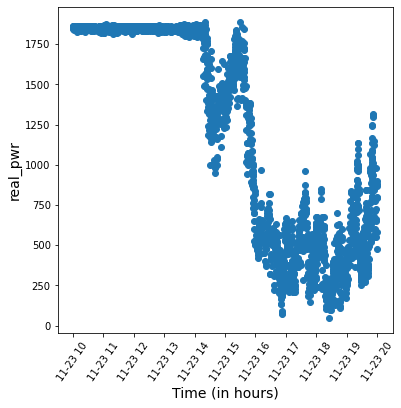

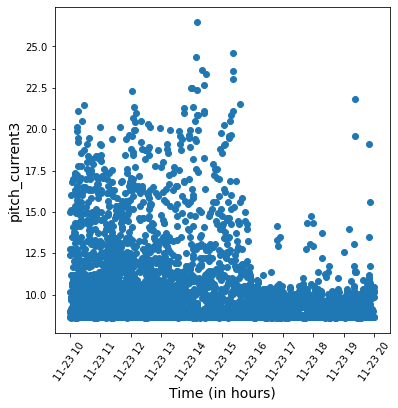

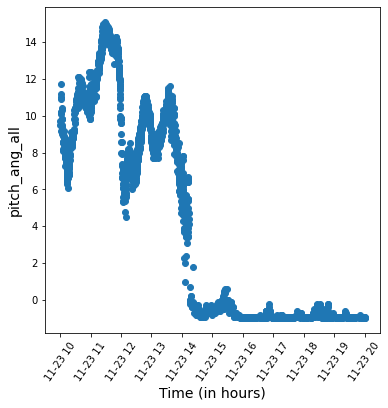

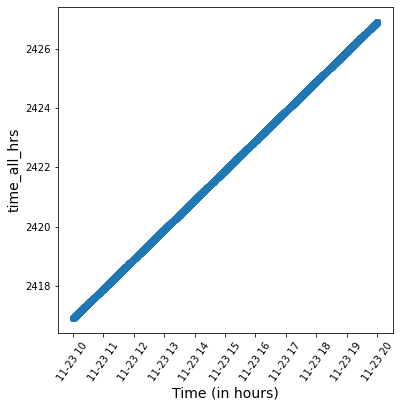

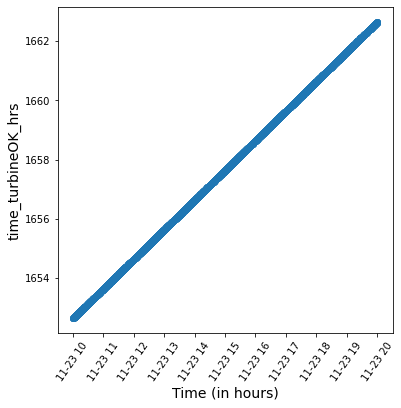

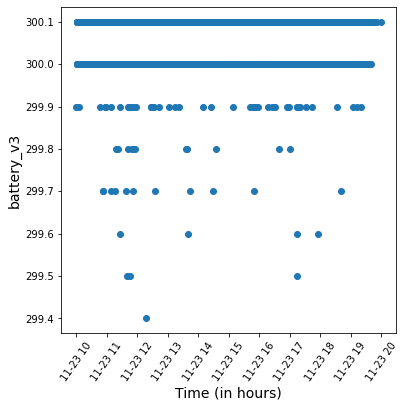

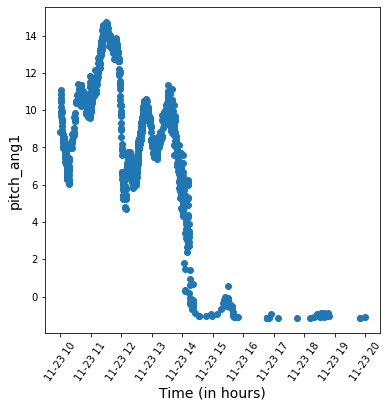

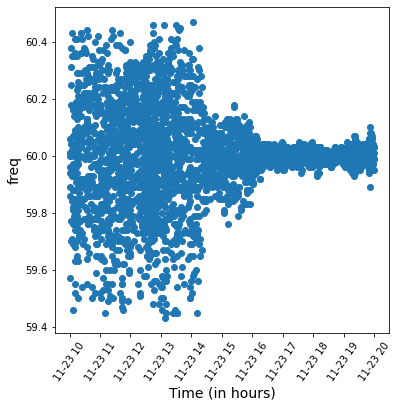

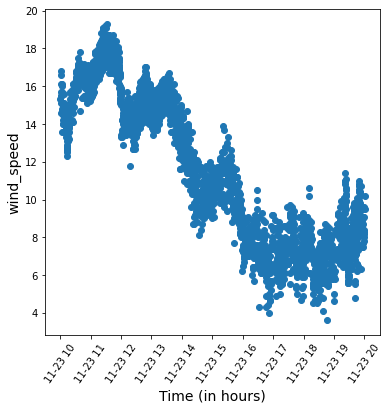

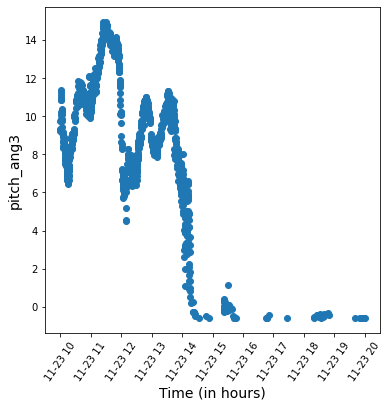

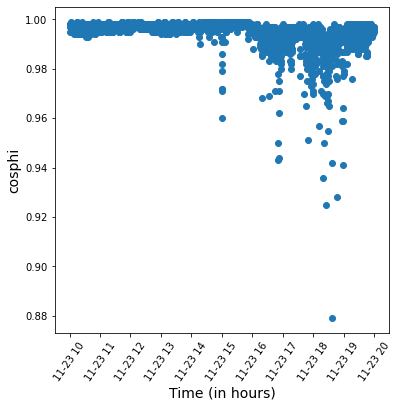

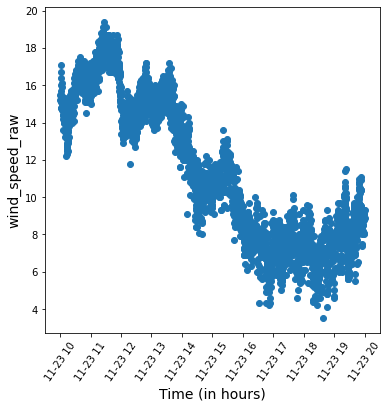

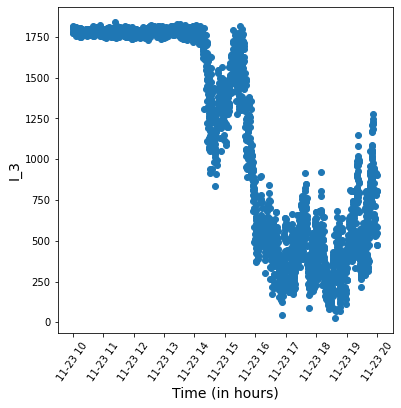

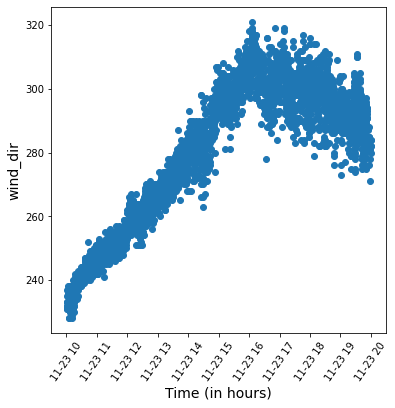

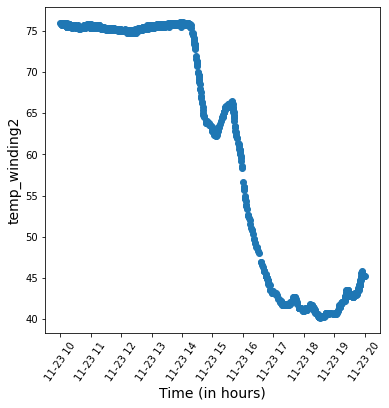

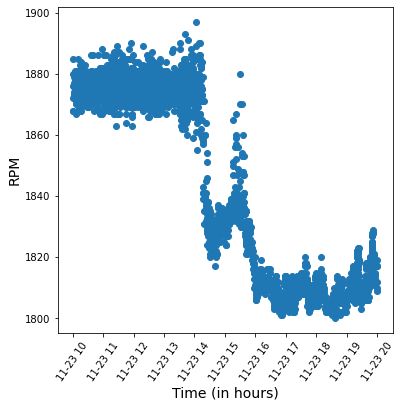

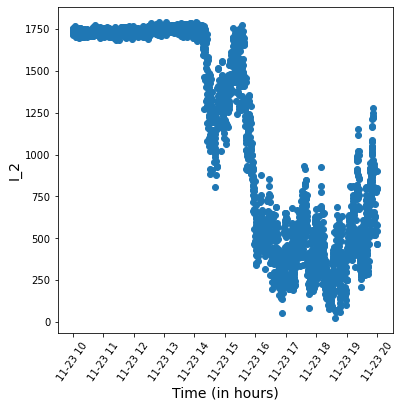

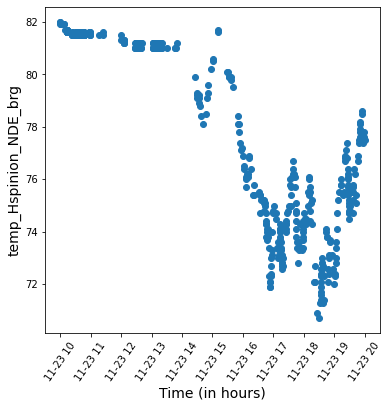

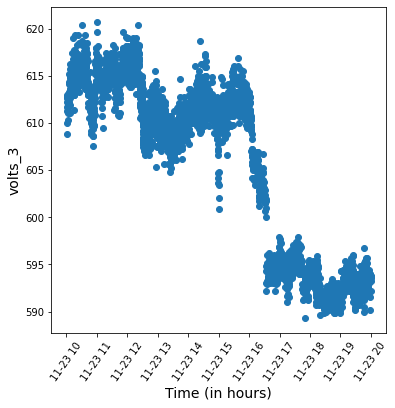

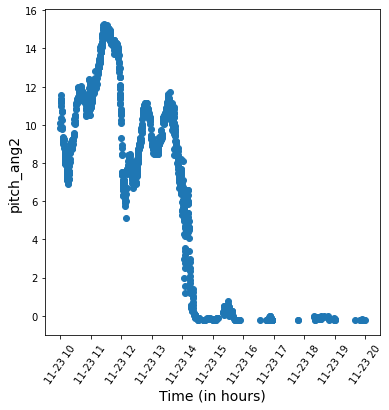

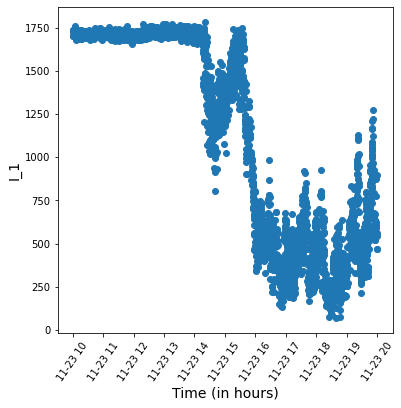

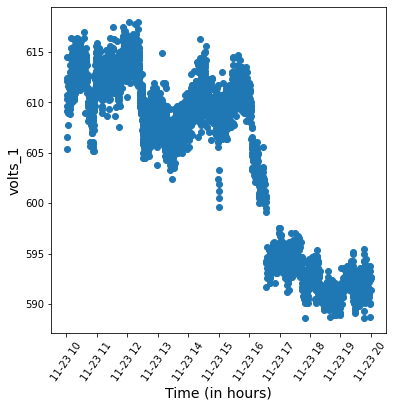

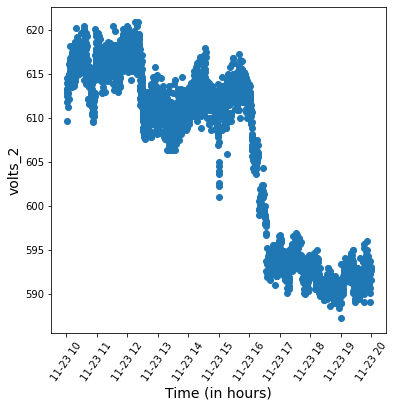

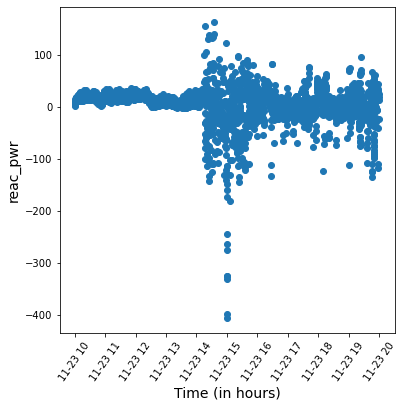

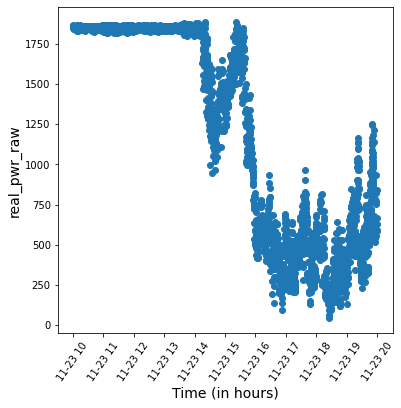

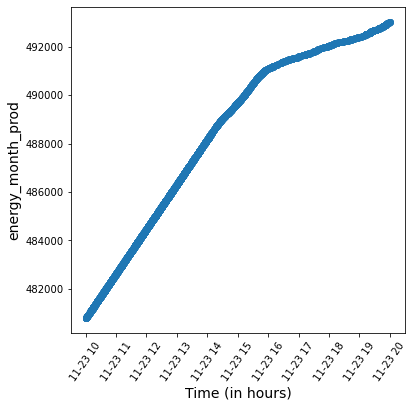

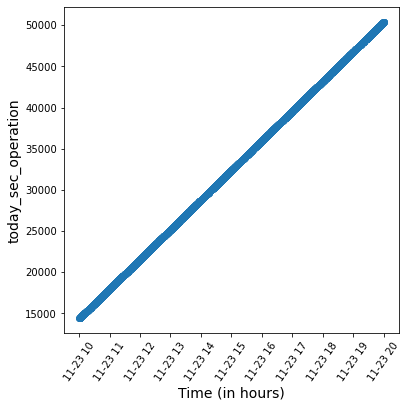

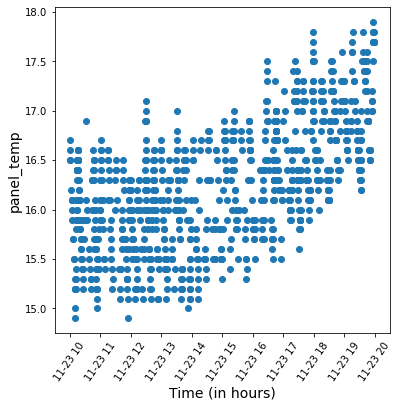

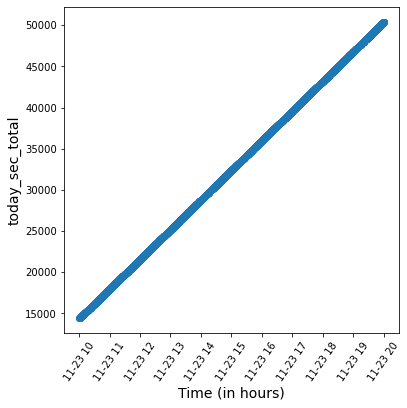

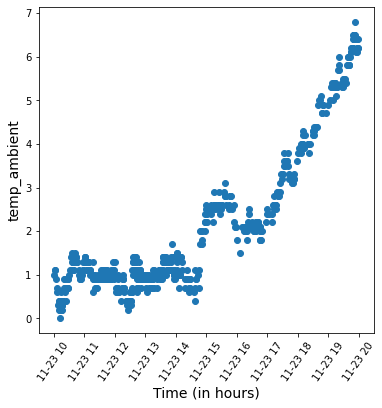

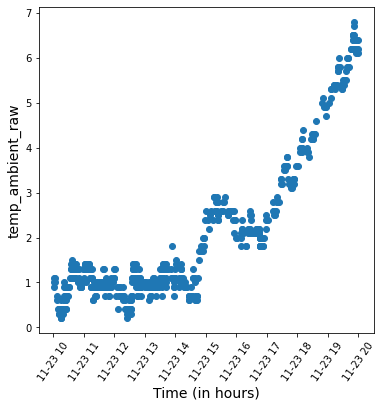

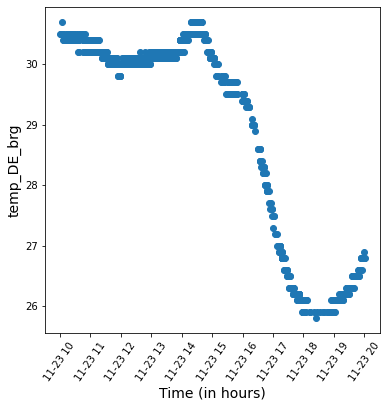

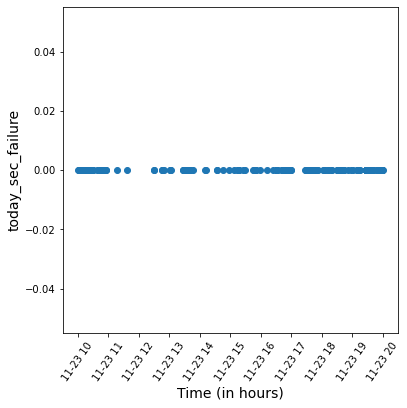

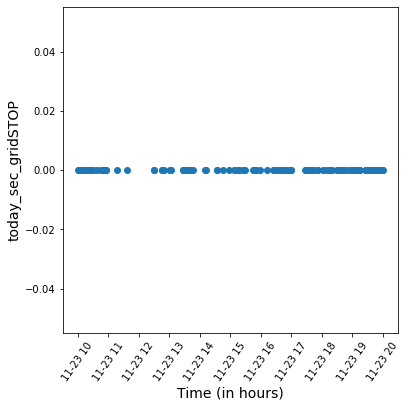

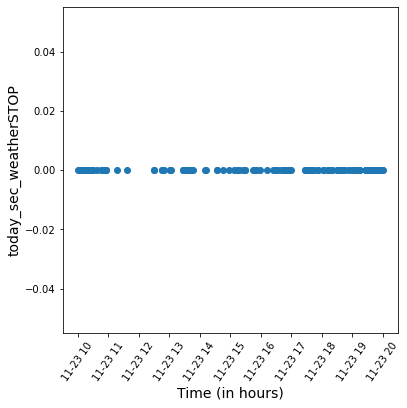

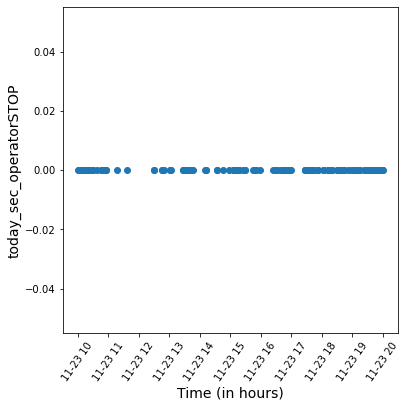

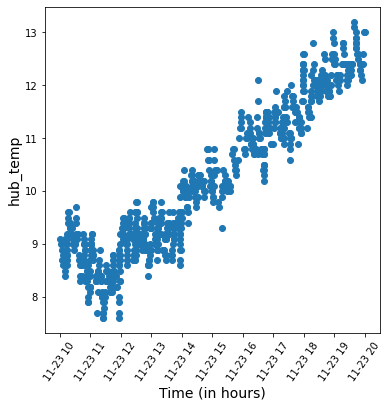

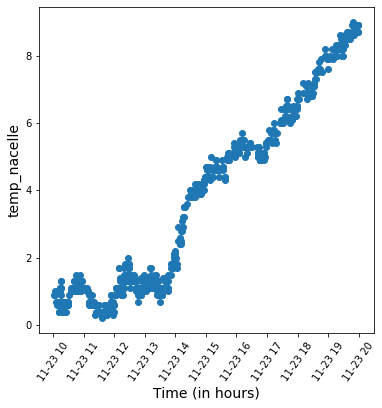

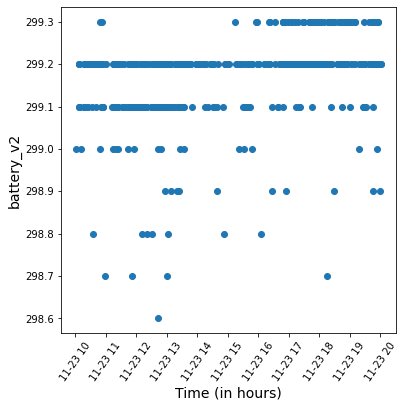

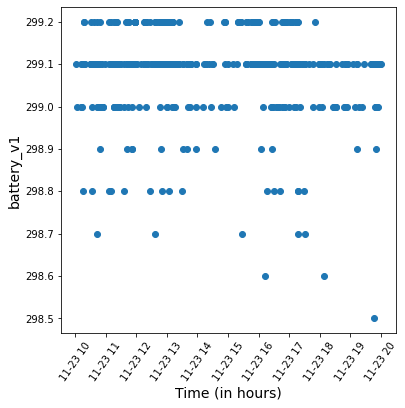

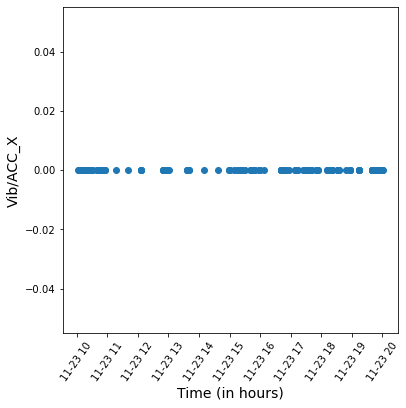

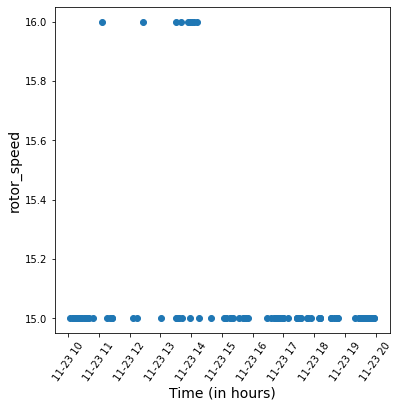

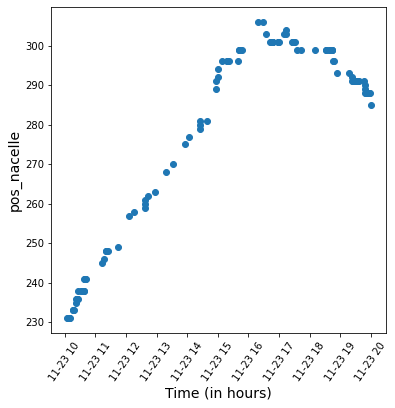

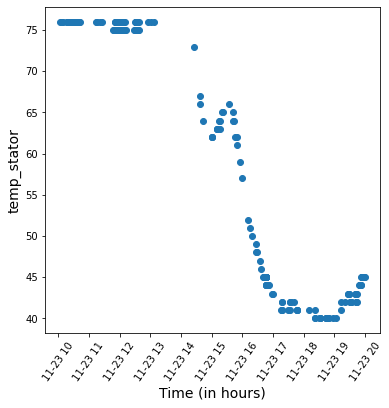

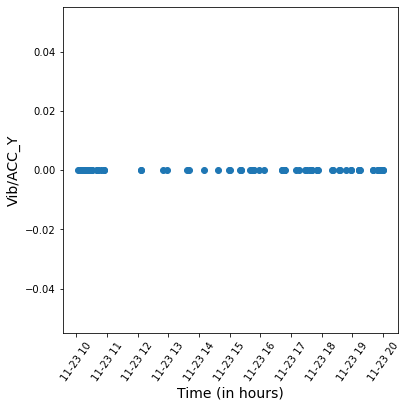

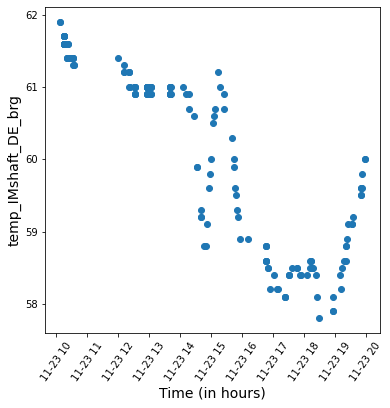

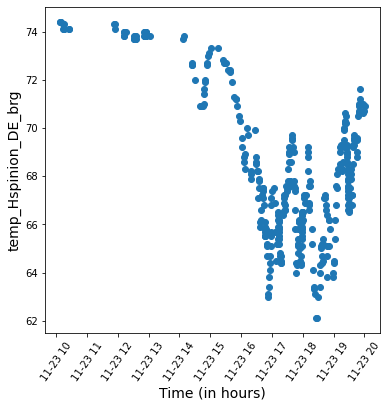

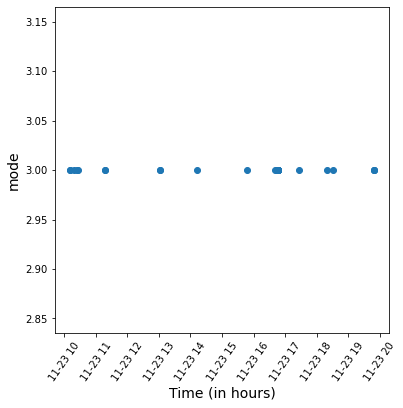

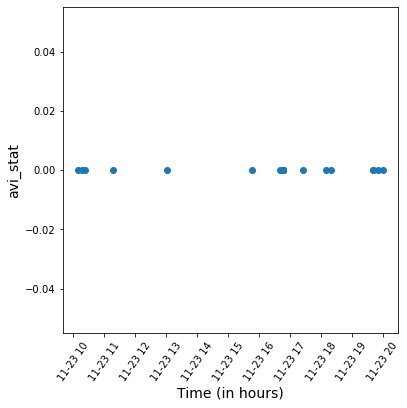

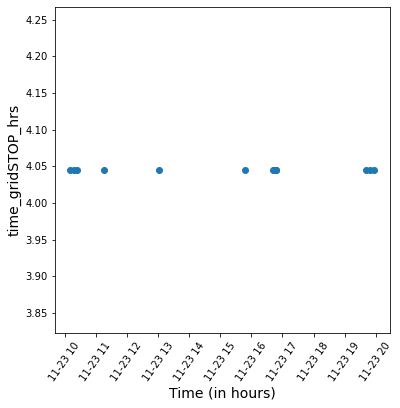

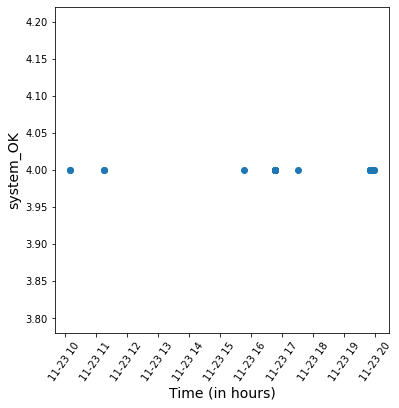

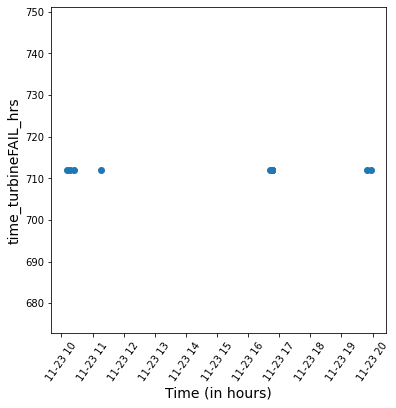

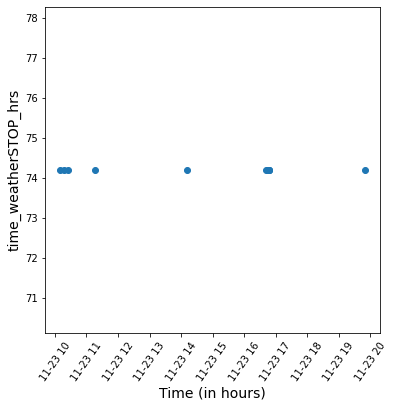

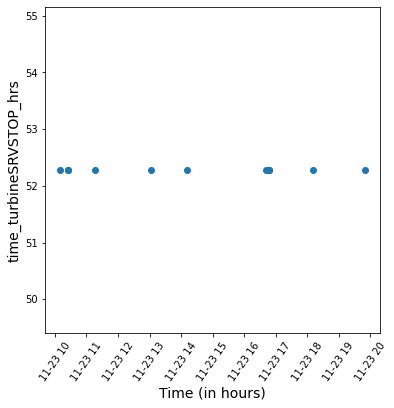

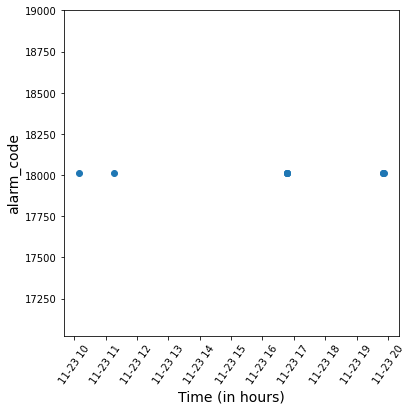

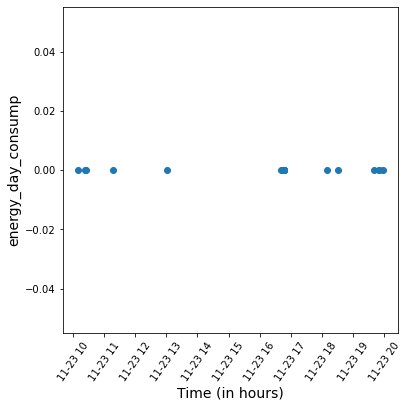

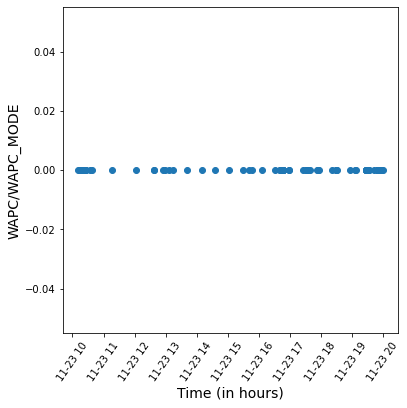

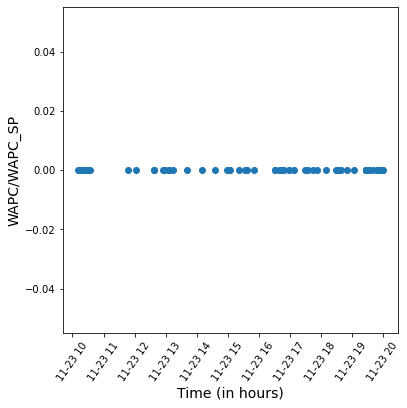

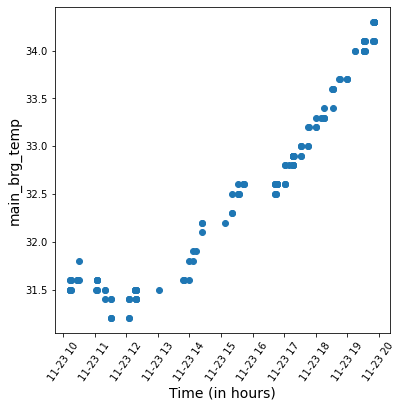

In [22]:
#Plotting the parameters for device 'WTG001'
Plotting_raw_data(df,'WTG001')

<ipython-input-21-ca4f92bf0881>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(a,figsize = (6,6))


Number of Figures: 77


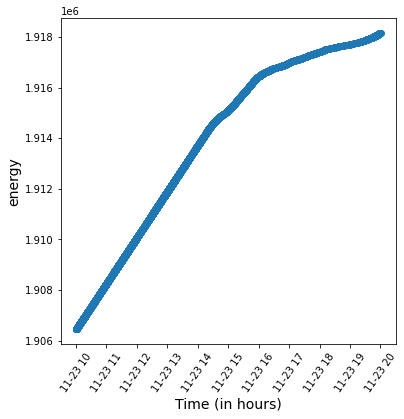

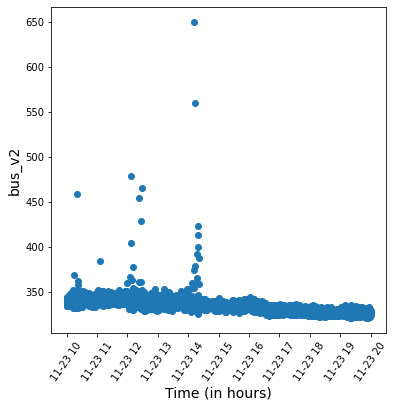

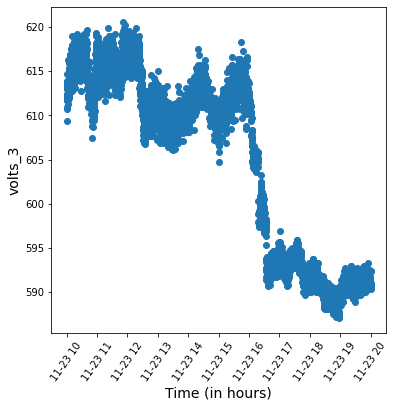

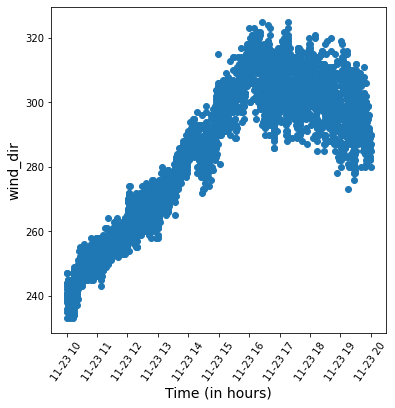

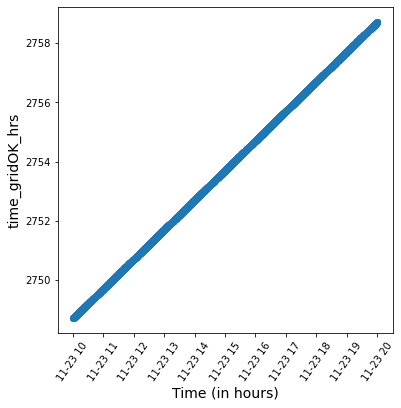

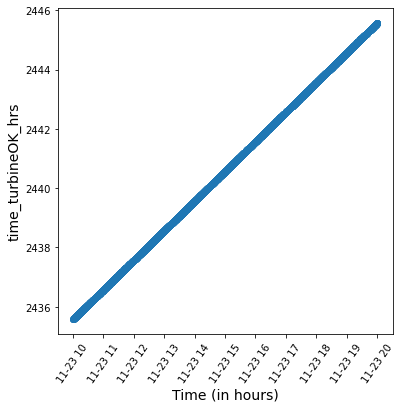

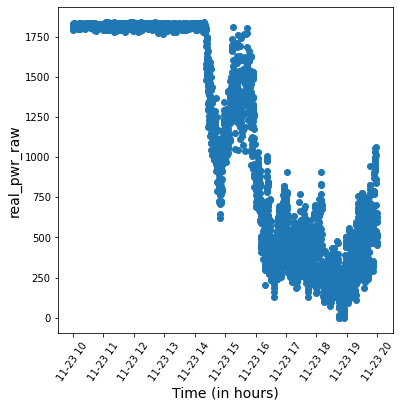

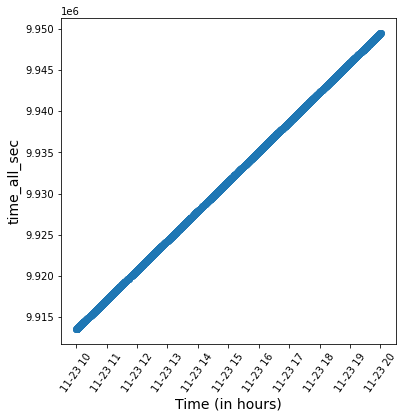

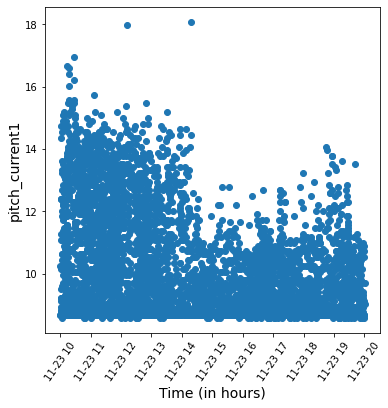

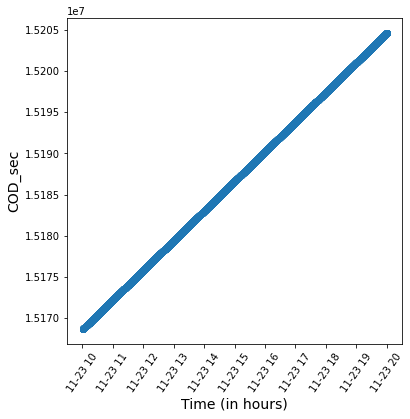

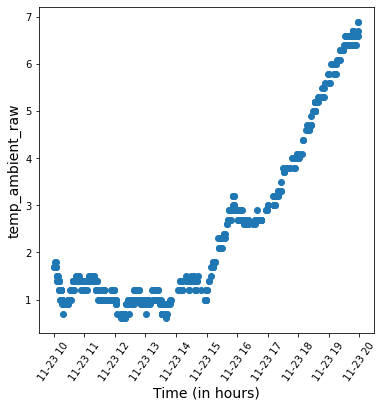

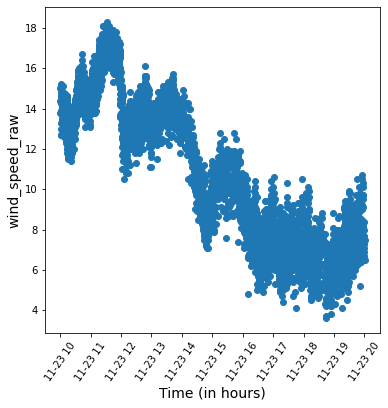

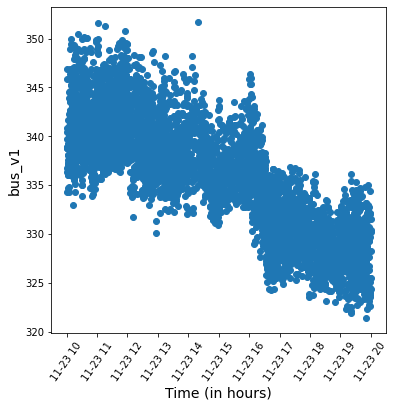

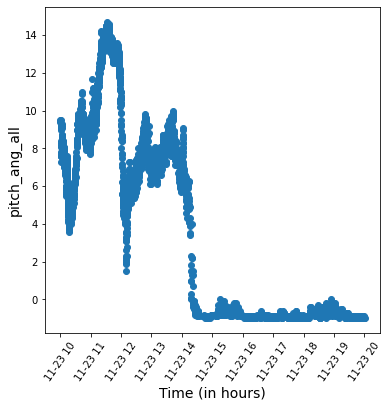

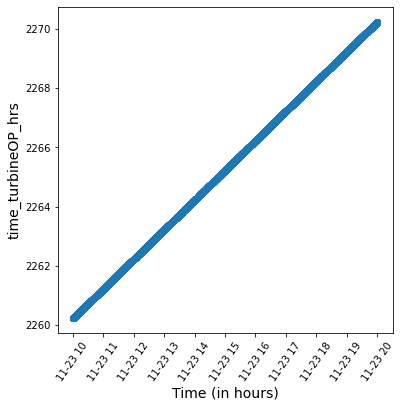

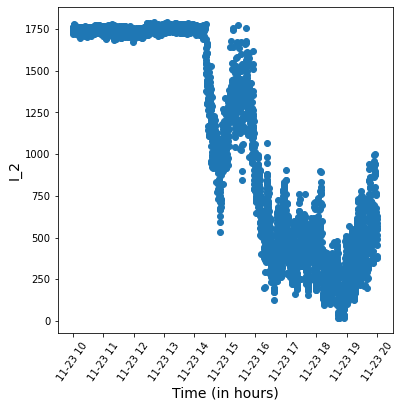

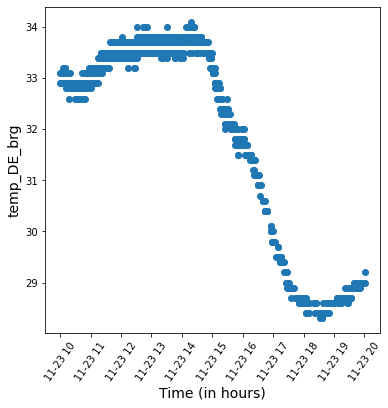

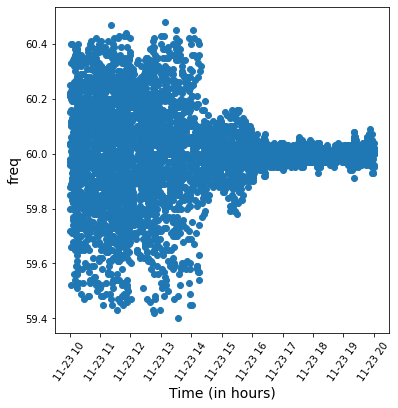

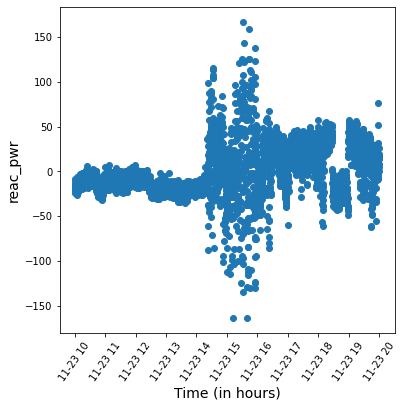

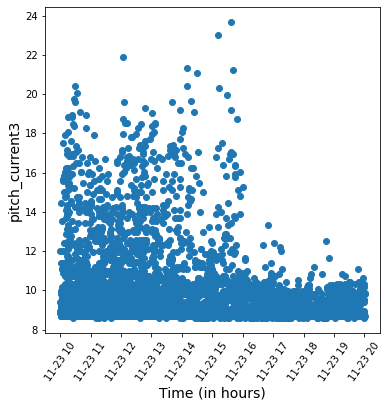

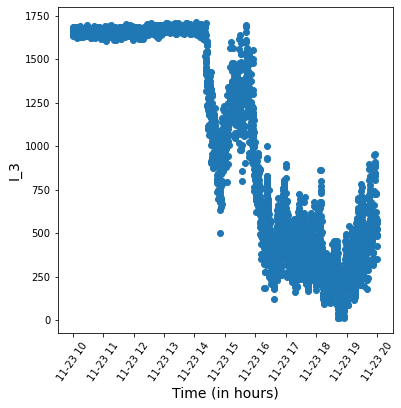

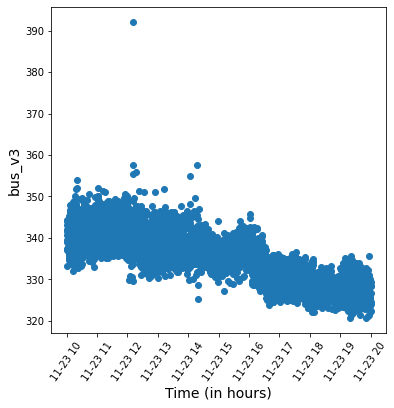

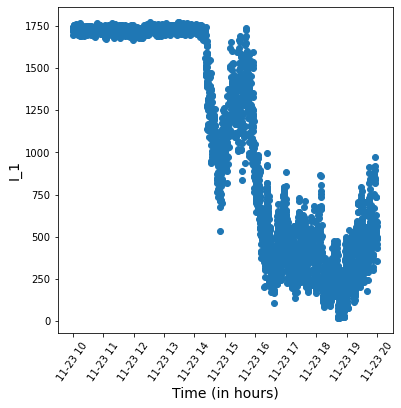

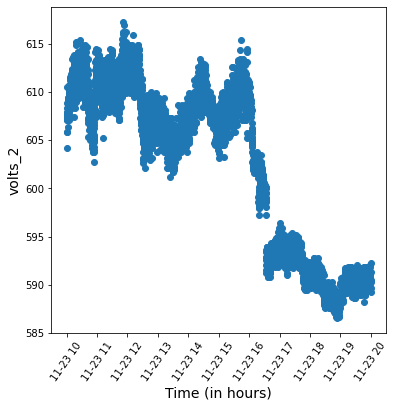

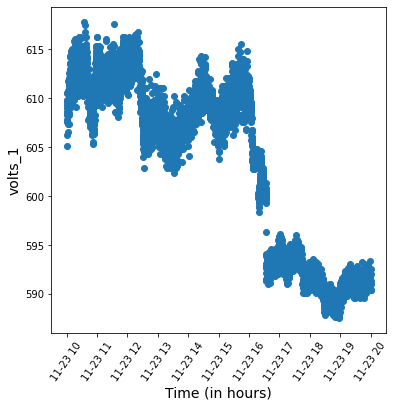

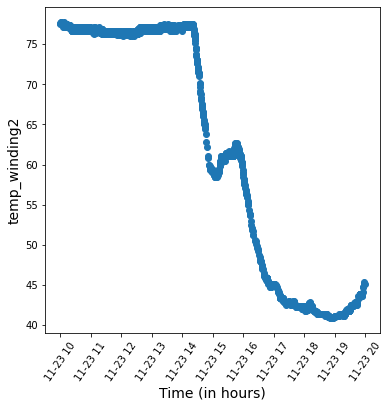

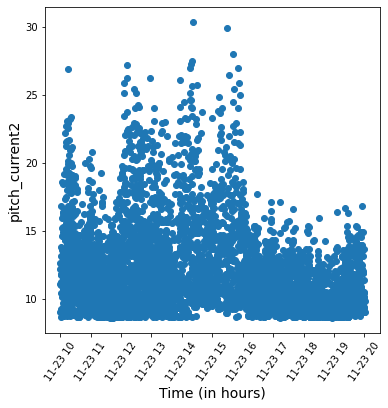

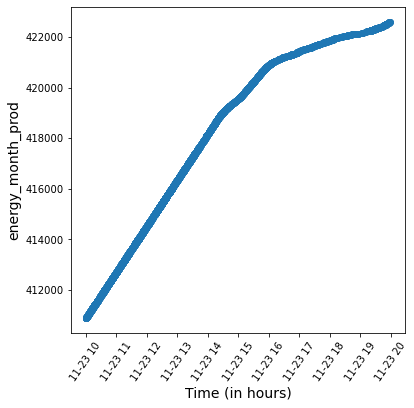

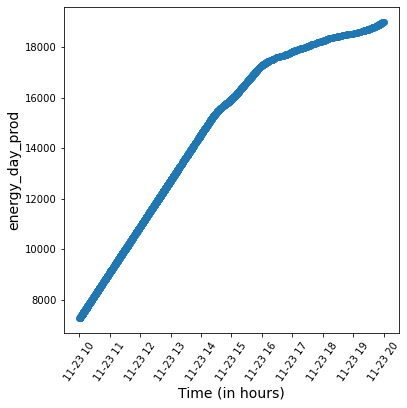

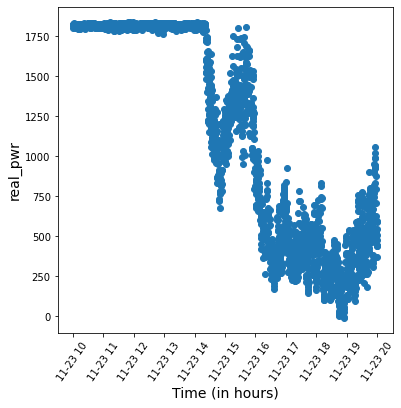

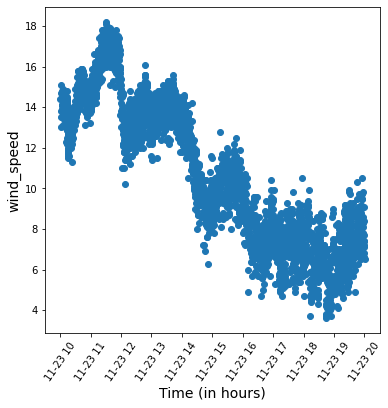

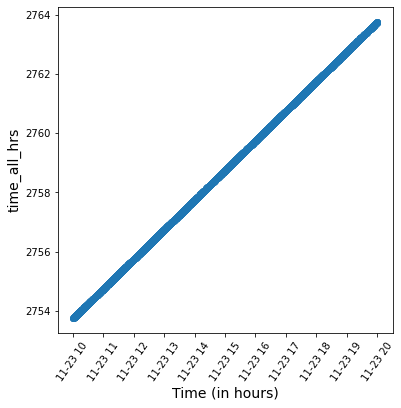

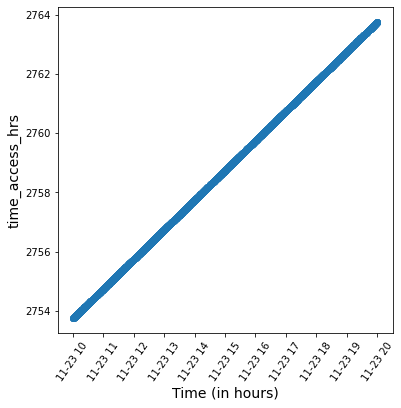

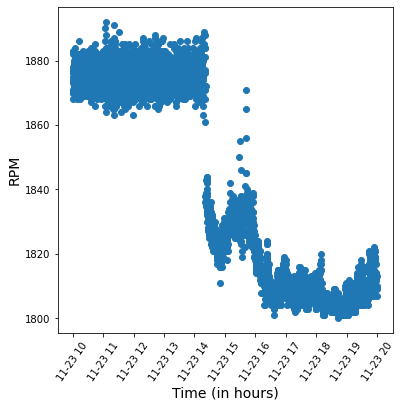

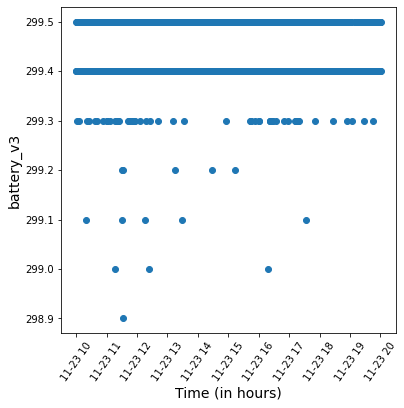

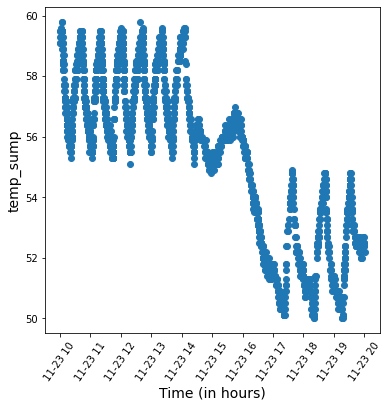

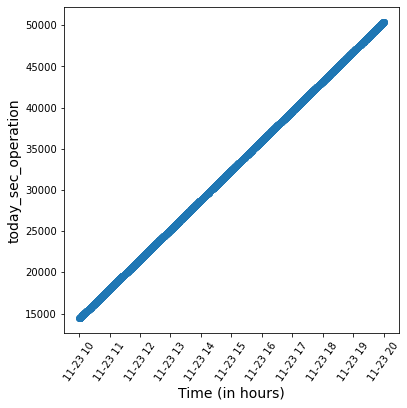

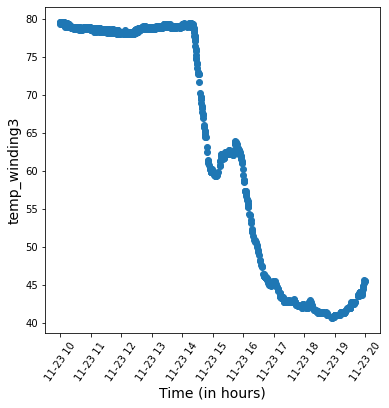

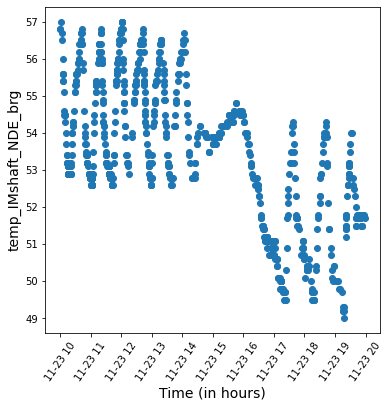

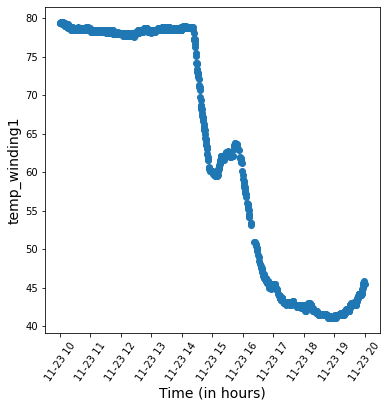

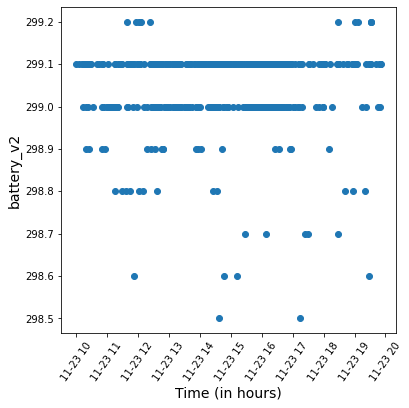

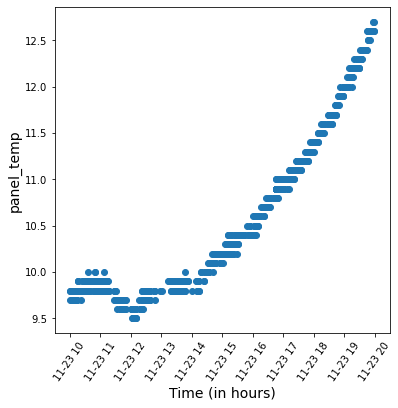

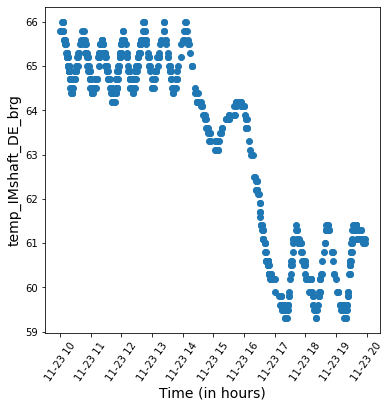

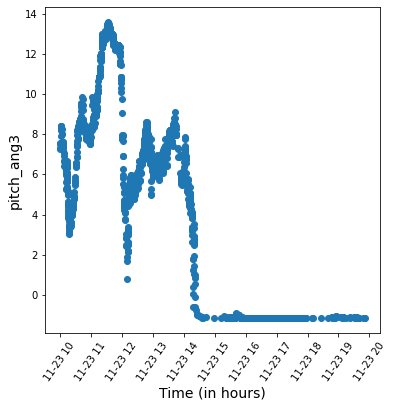

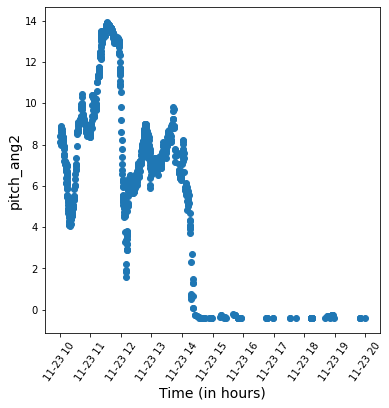

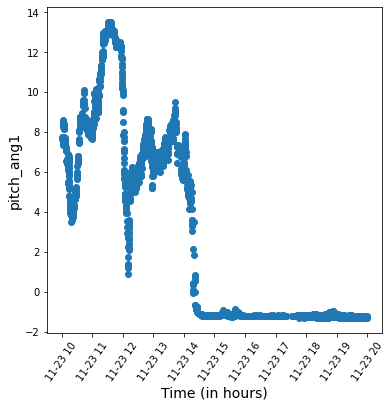

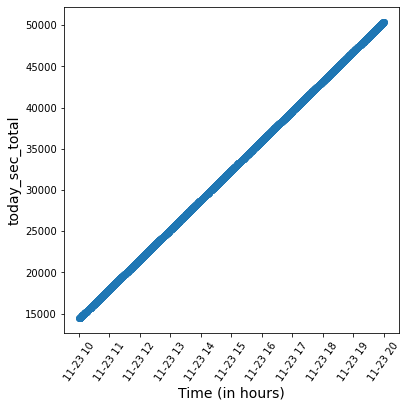

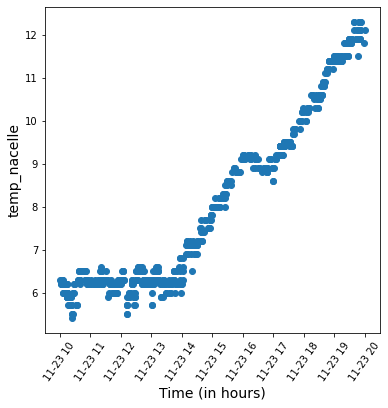

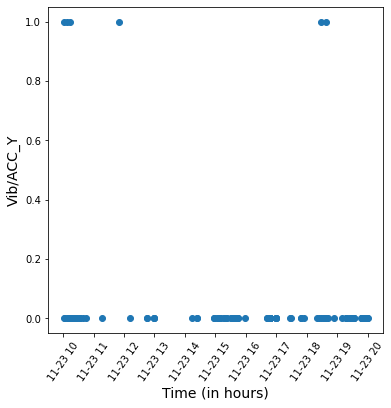

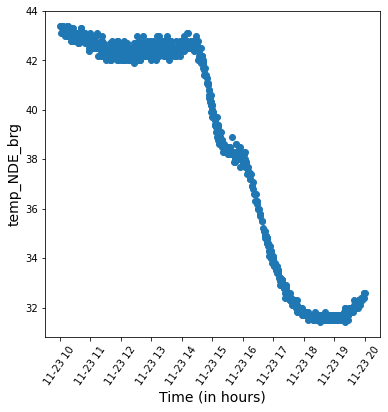

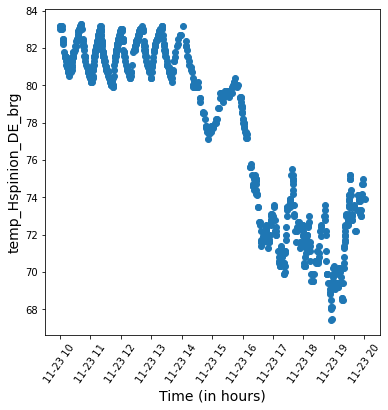

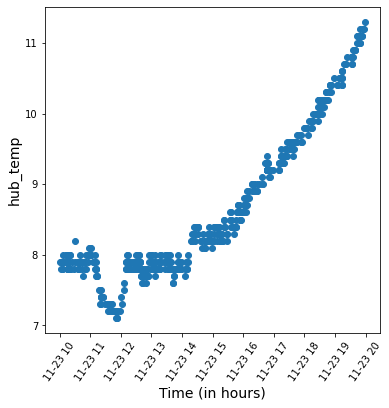

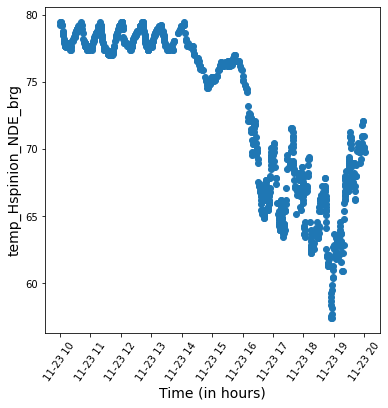

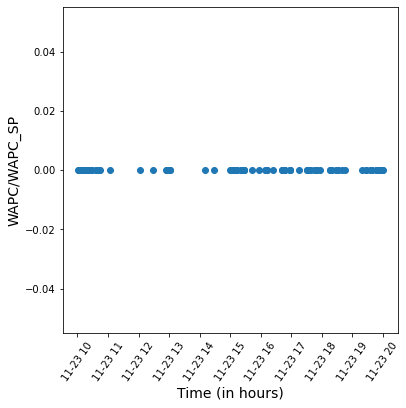

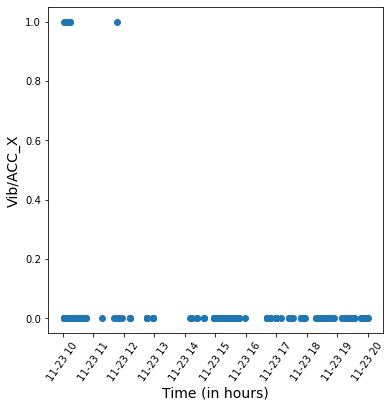

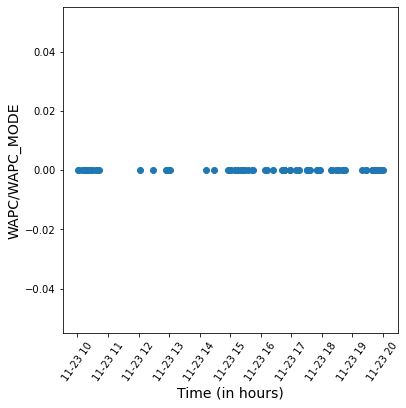

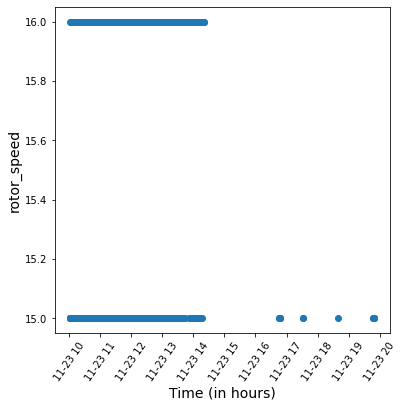

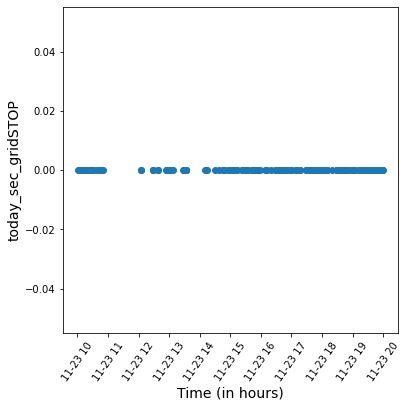

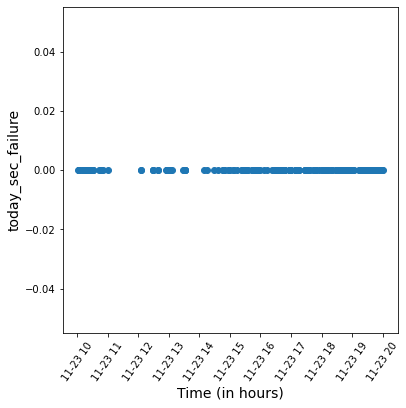

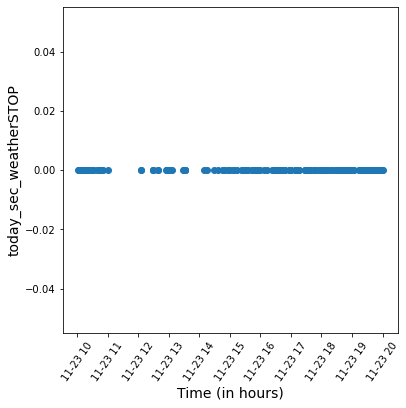

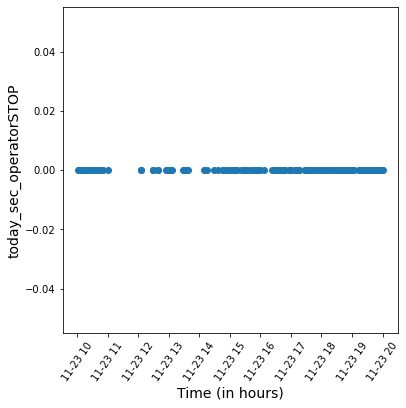

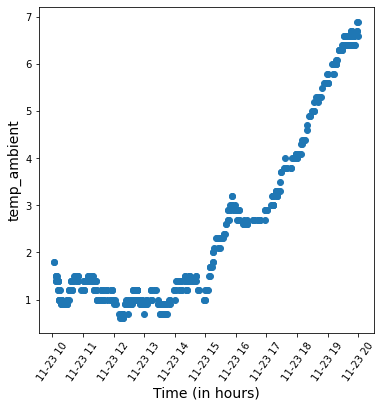

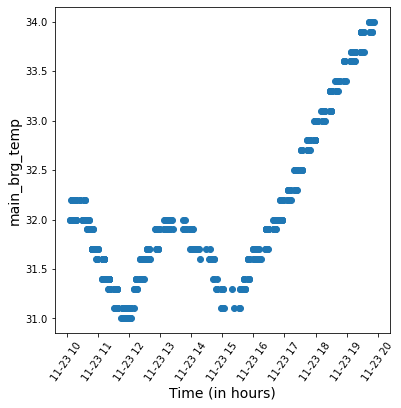

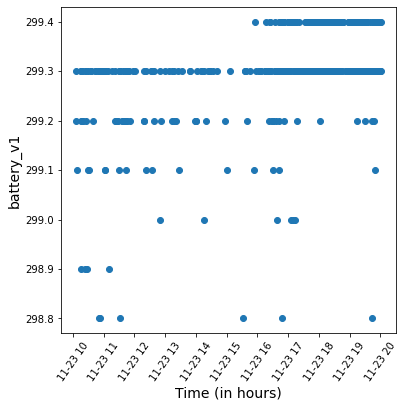

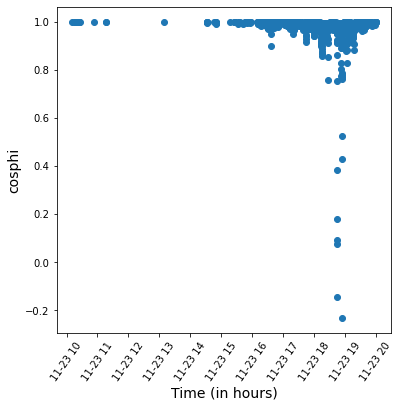

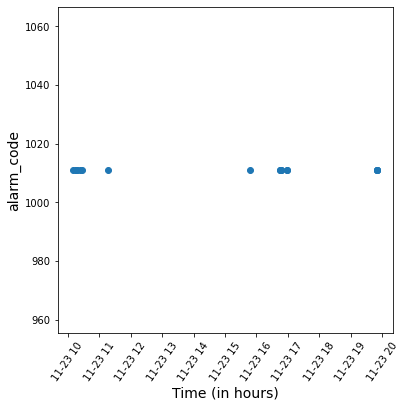

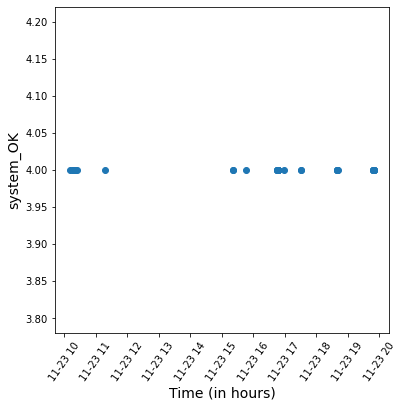

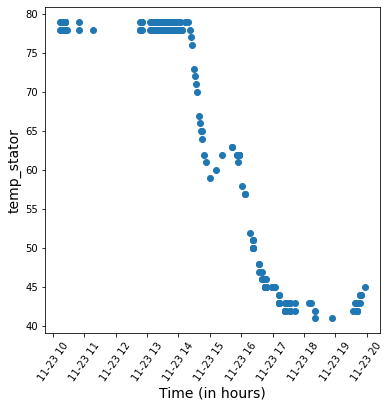

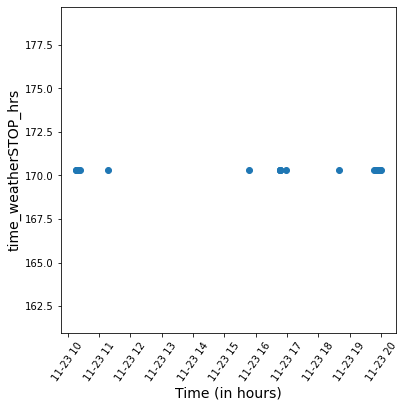

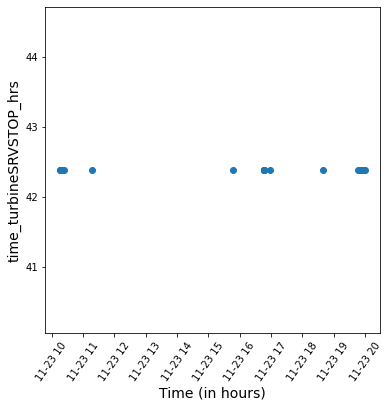

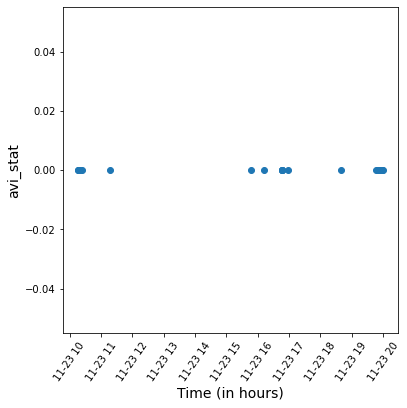

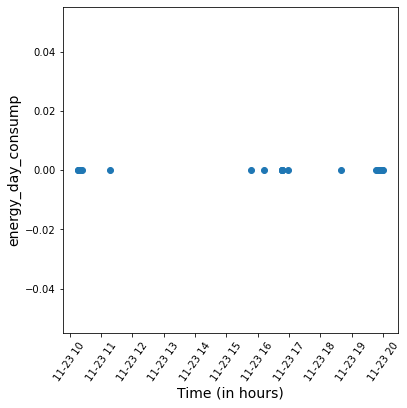

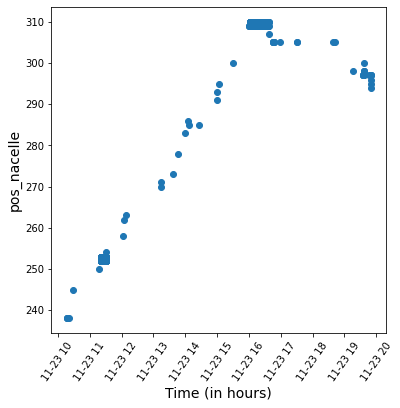

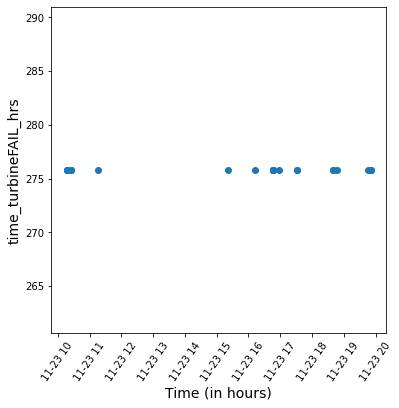

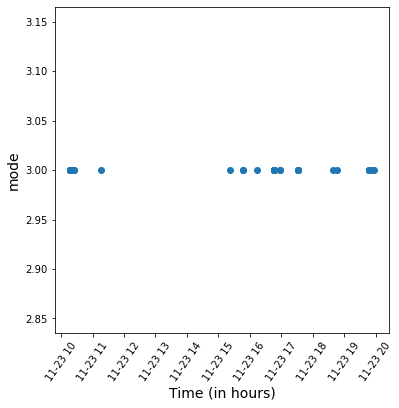

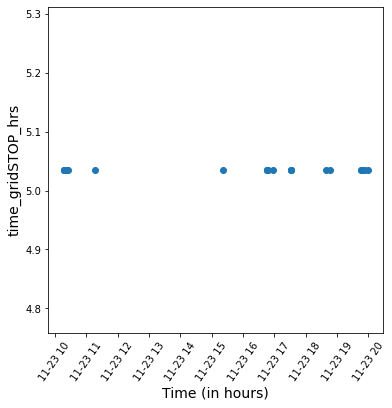

In [23]:
#Plotting the parameters for device 'WTG002'
Plotting_raw_data(df,'WTG002')

<ipython-input-21-ca4f92bf0881>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(a,figsize = (6,6))


Number of Figures: 77


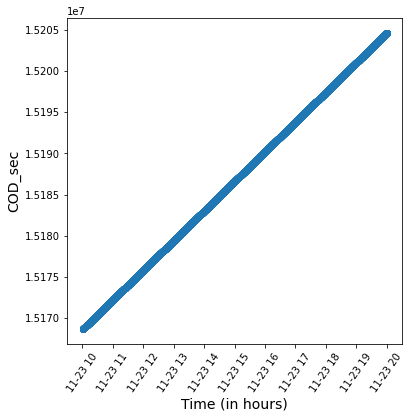

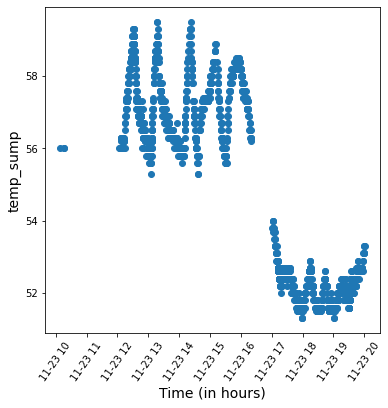

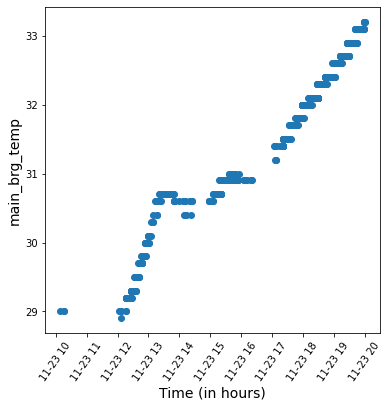

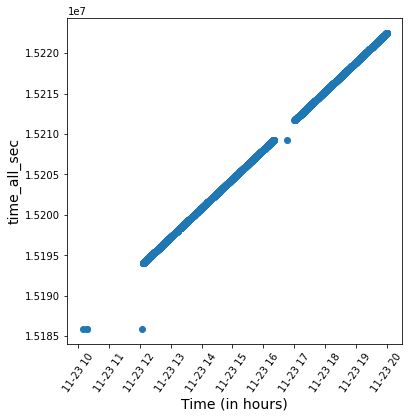

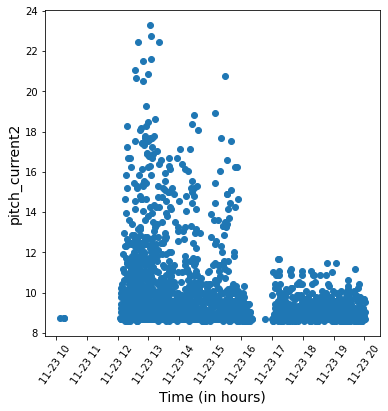

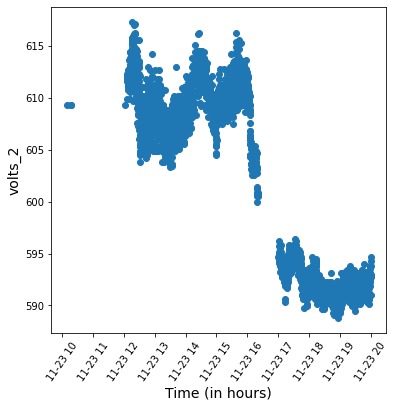

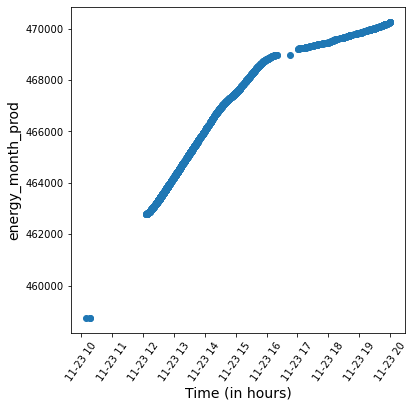

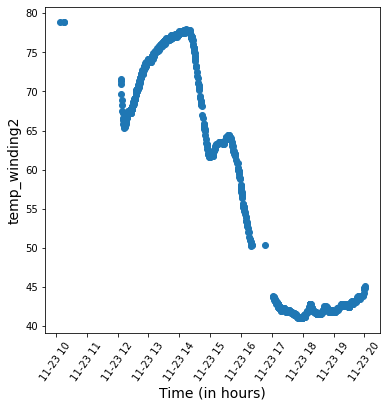

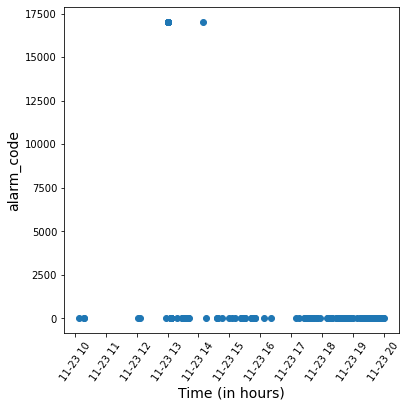

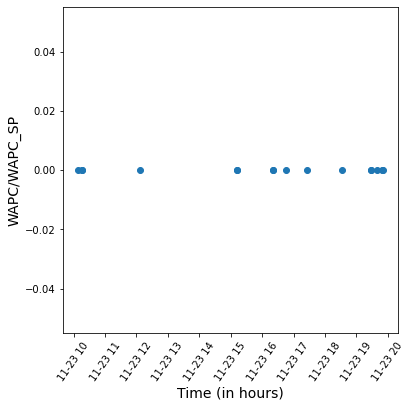

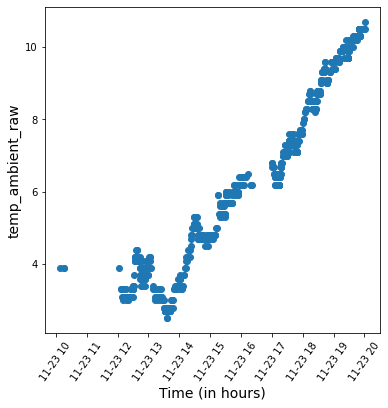

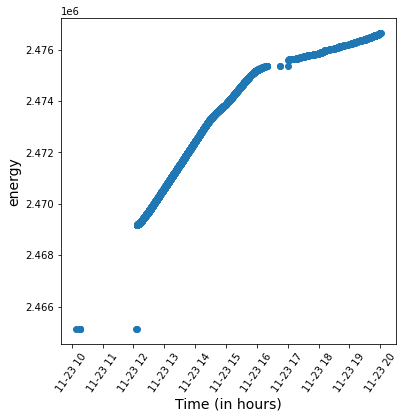

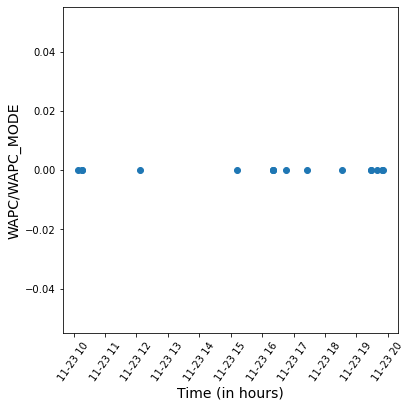

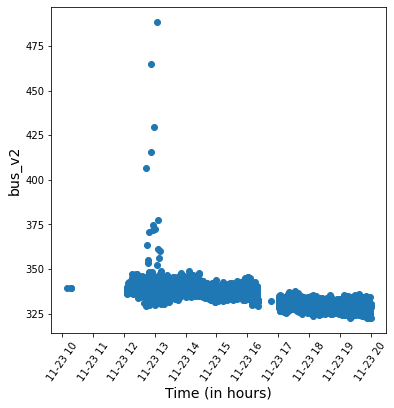

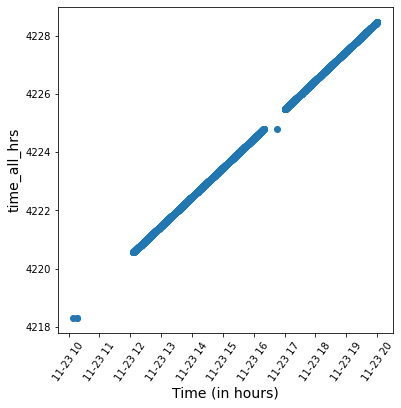

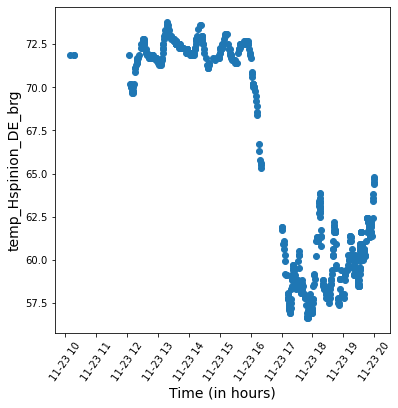

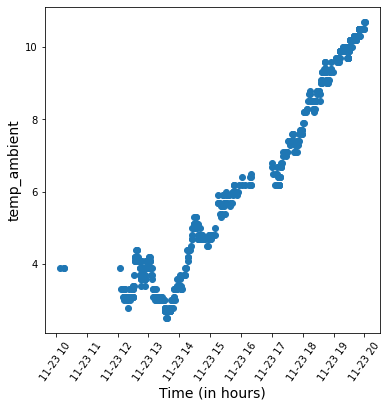

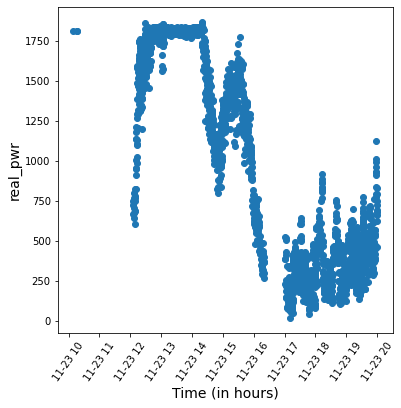

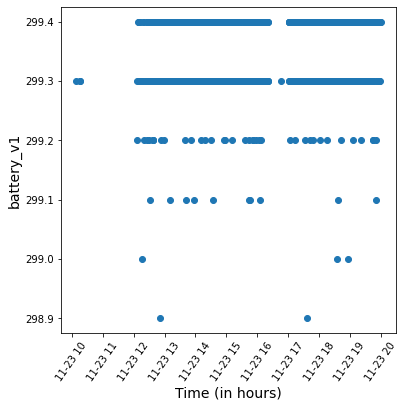

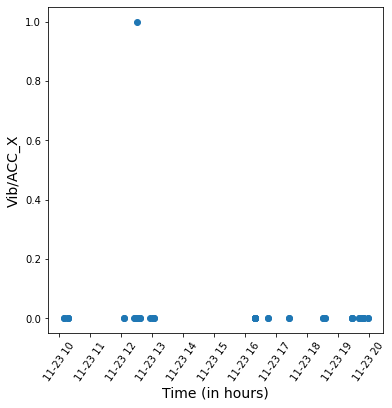

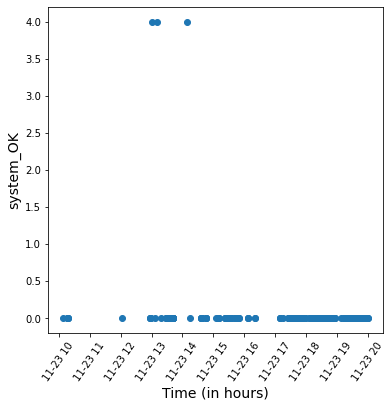

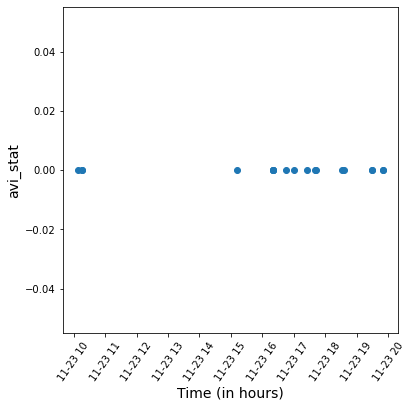

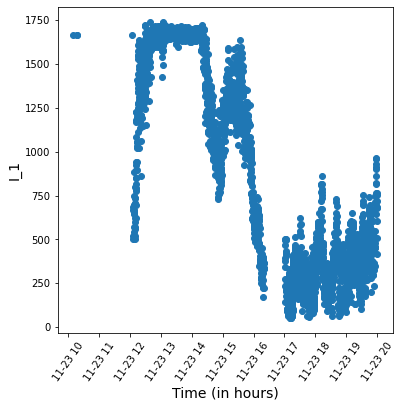

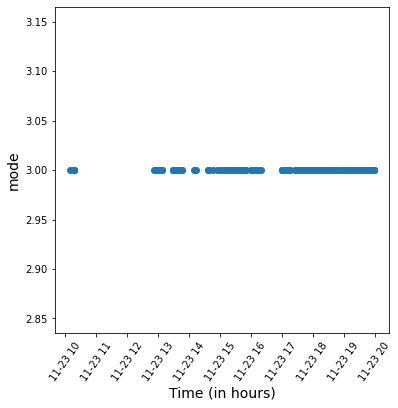

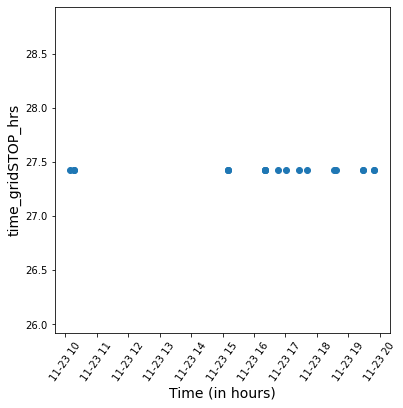

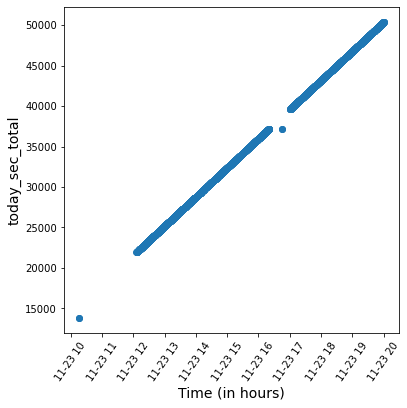

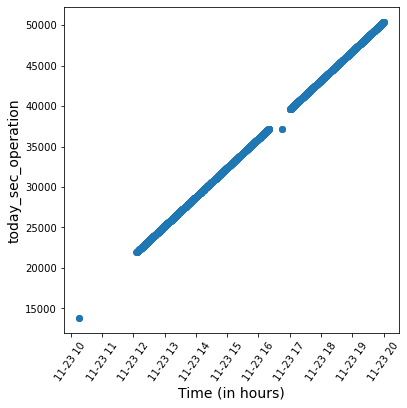

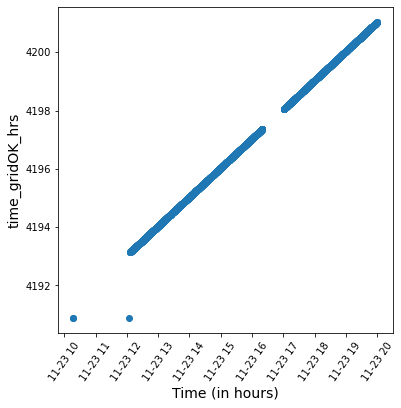

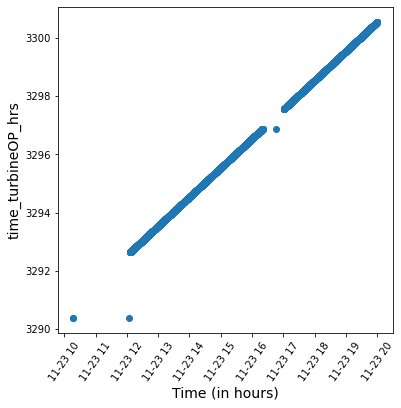

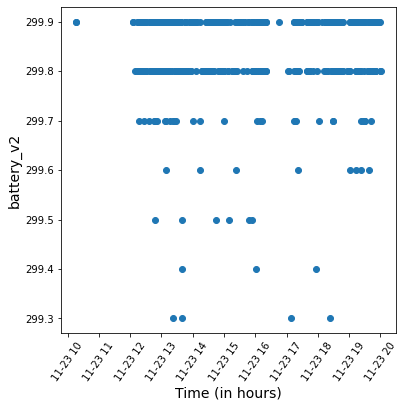

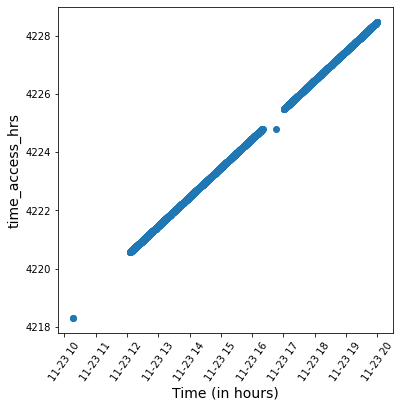

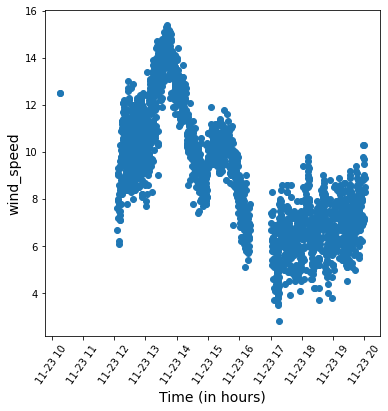

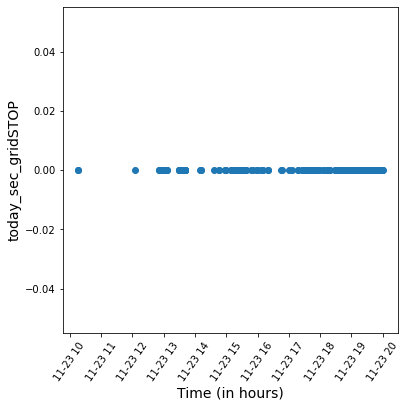

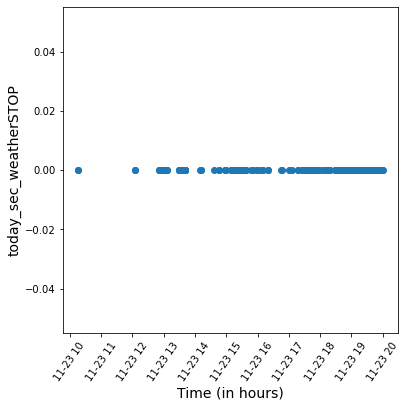

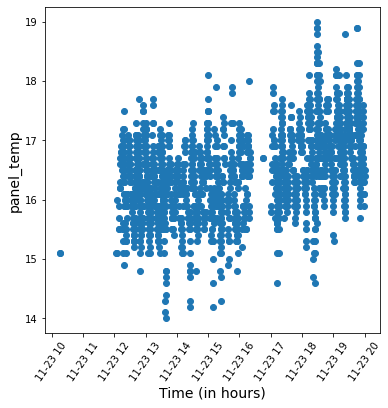

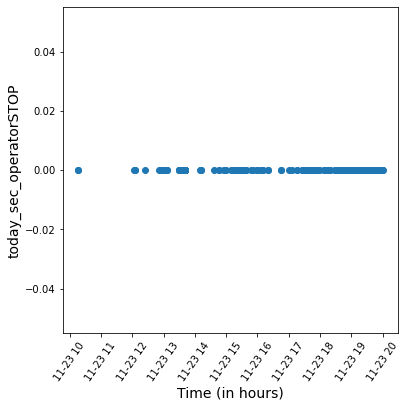

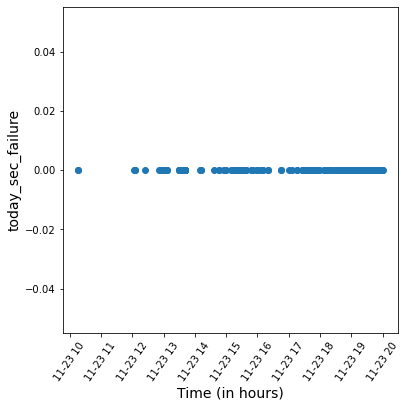

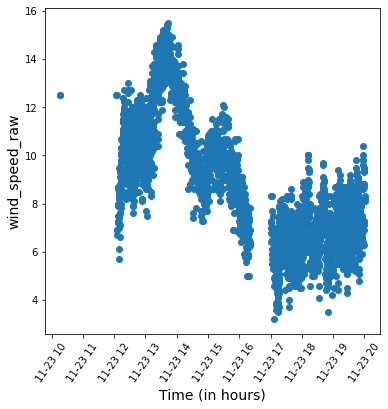

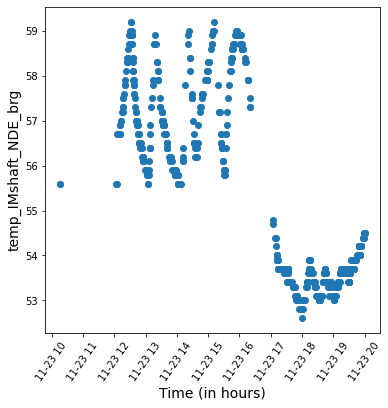

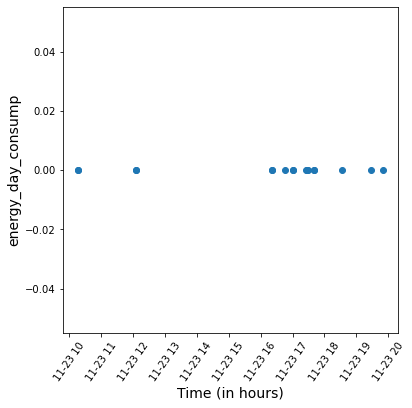

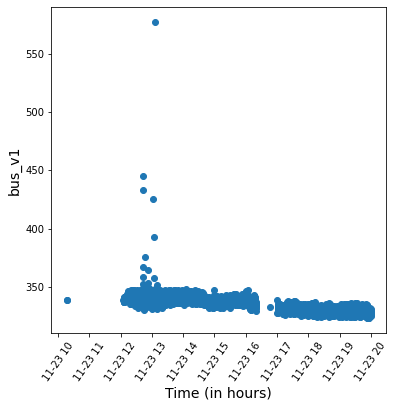

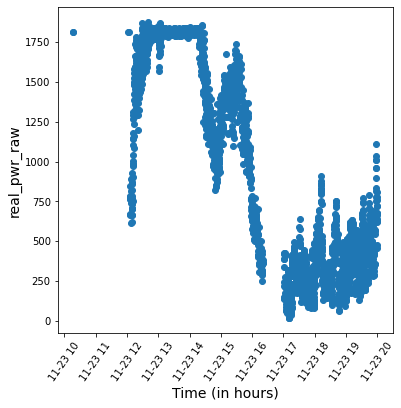

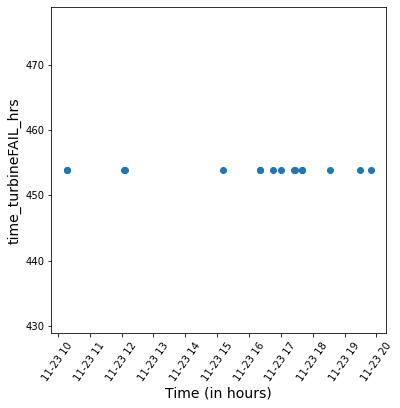

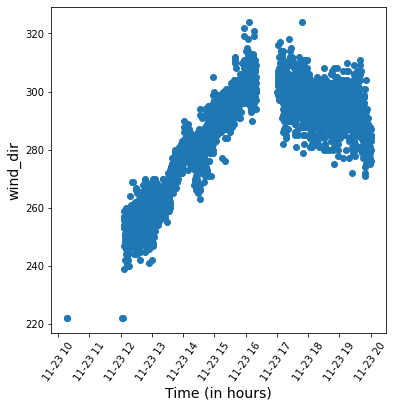

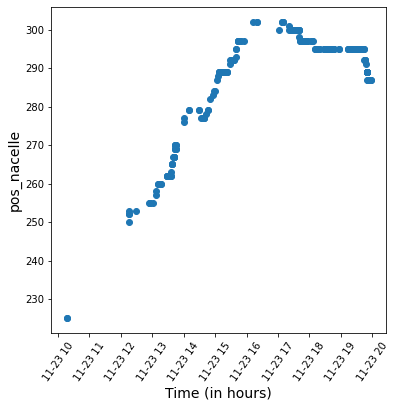

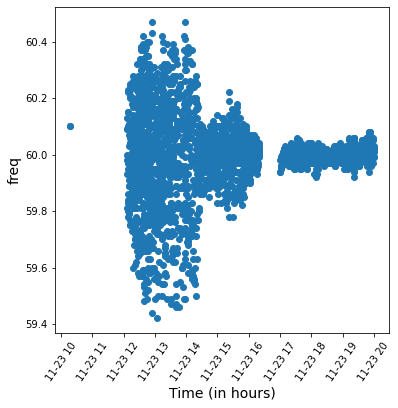

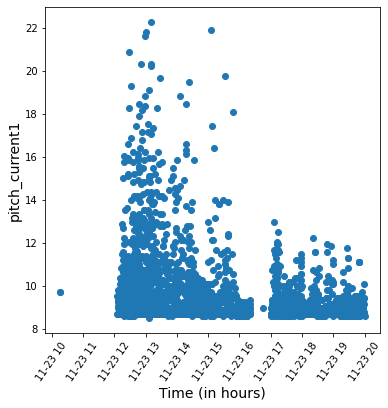

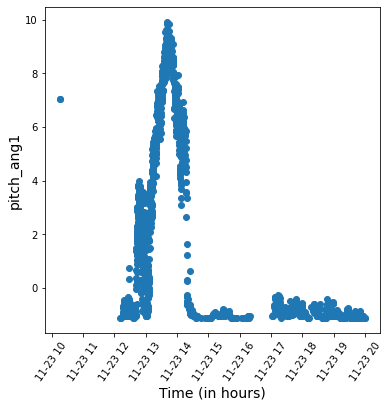

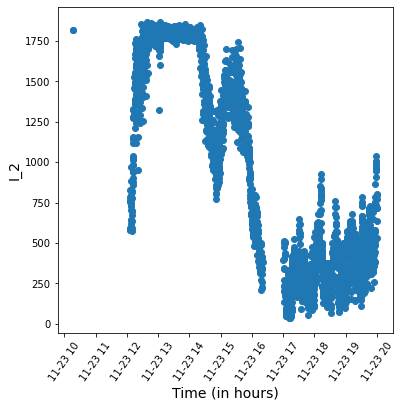

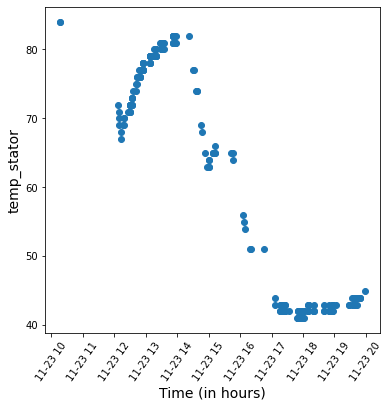

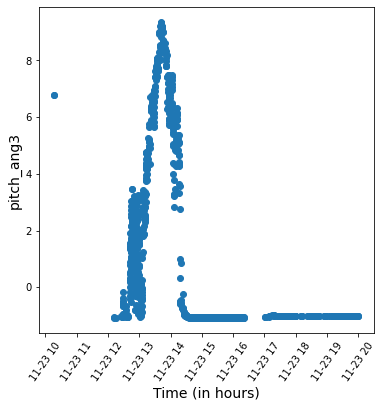

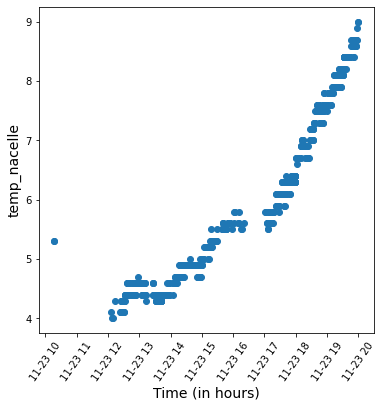

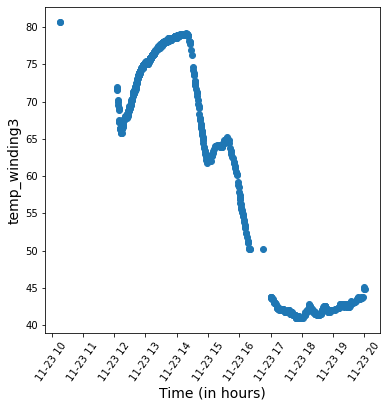

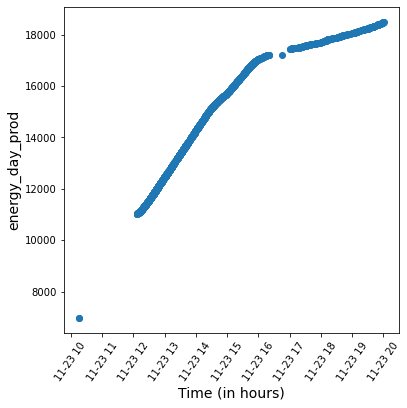

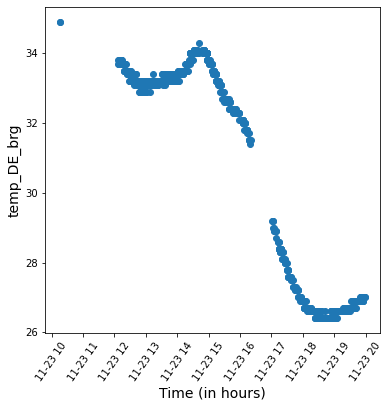

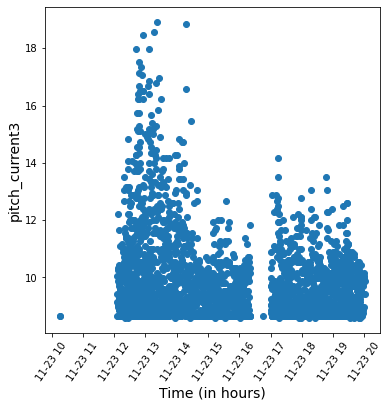

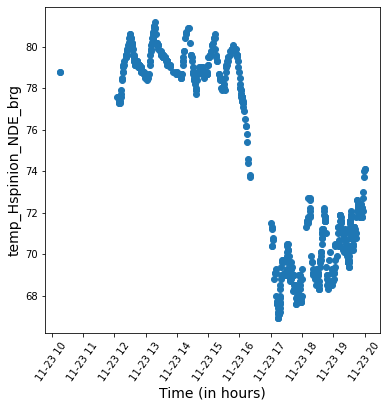

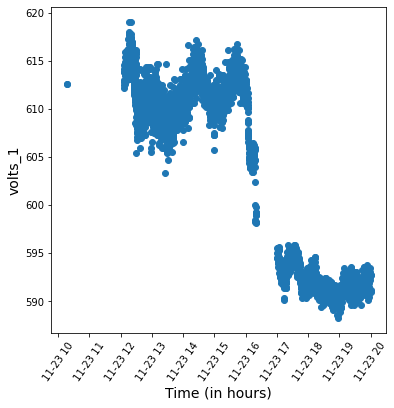

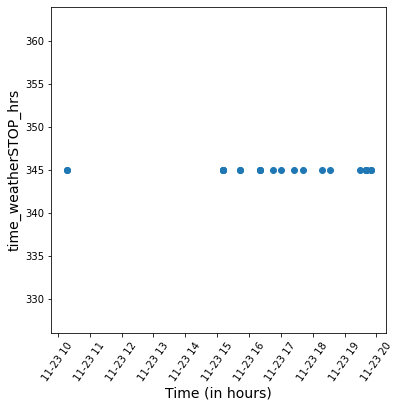

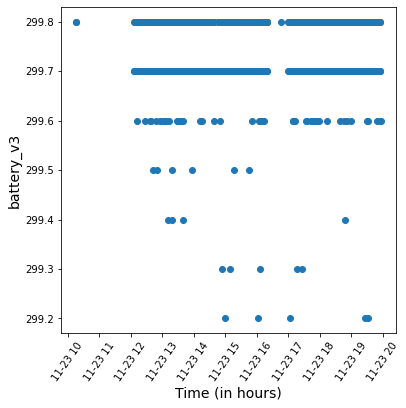

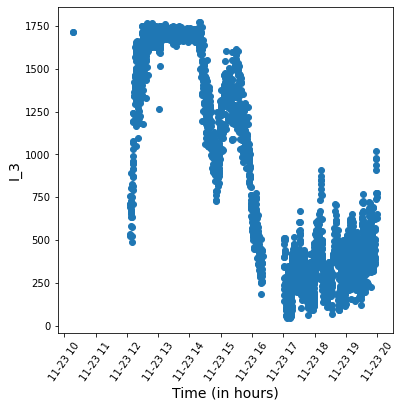

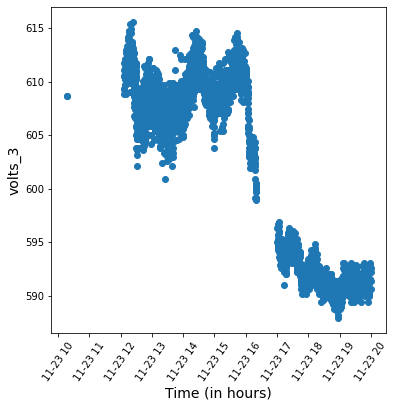

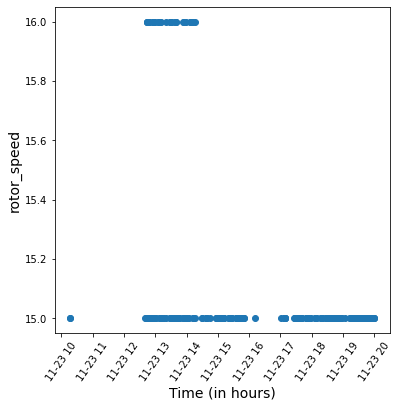

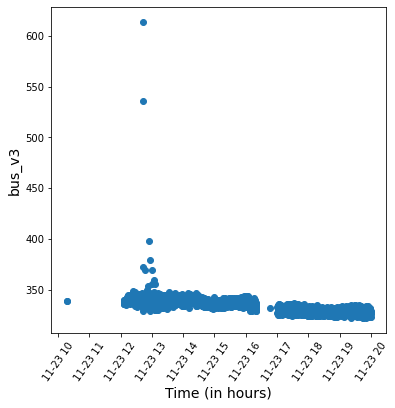

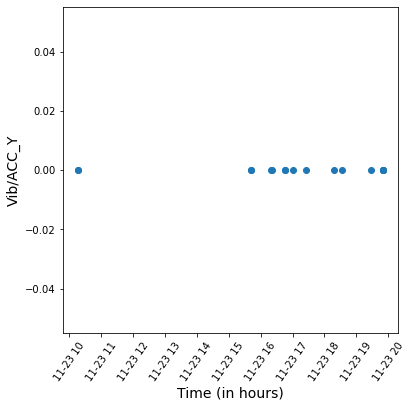

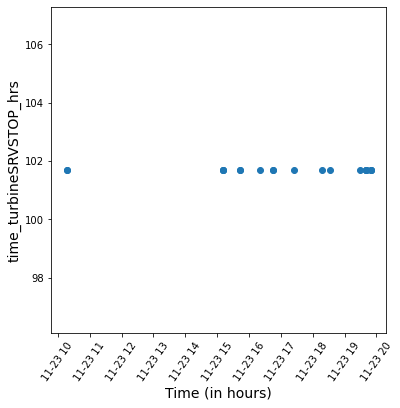

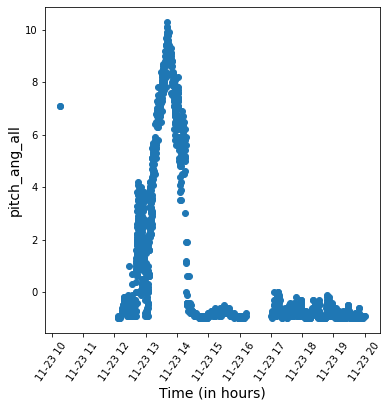

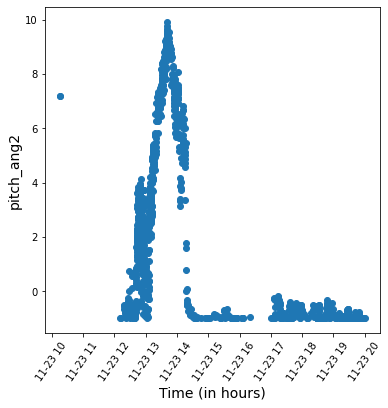

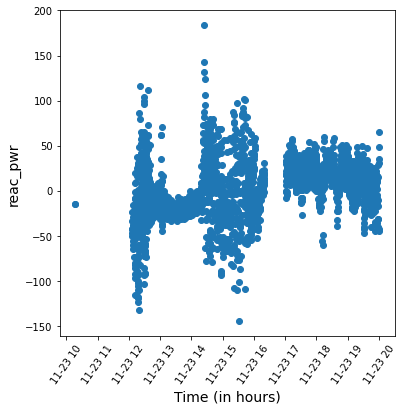

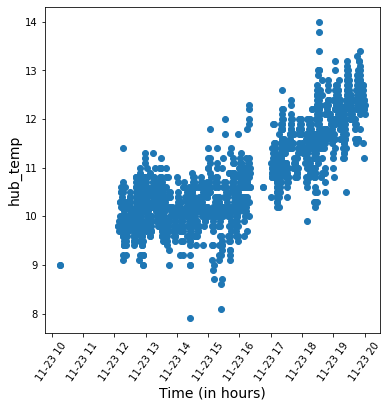

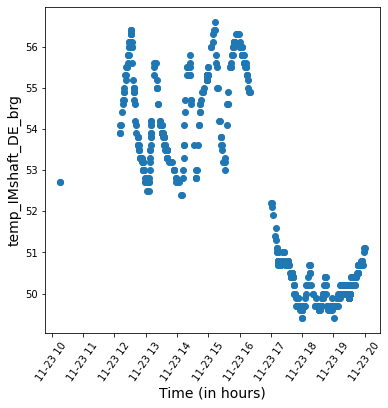

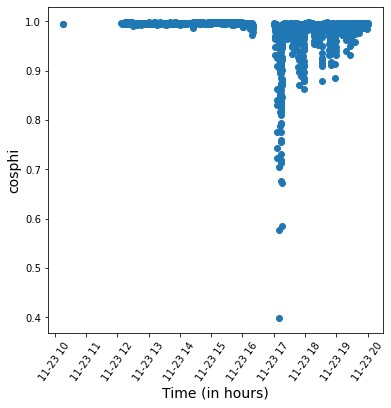

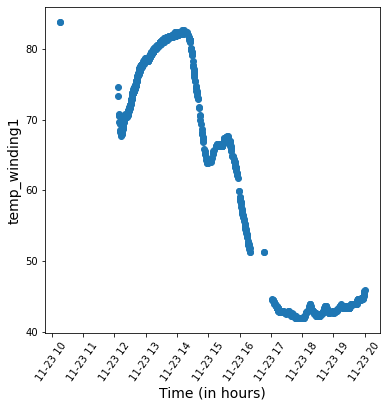

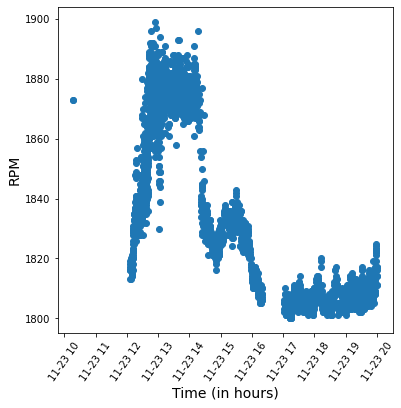

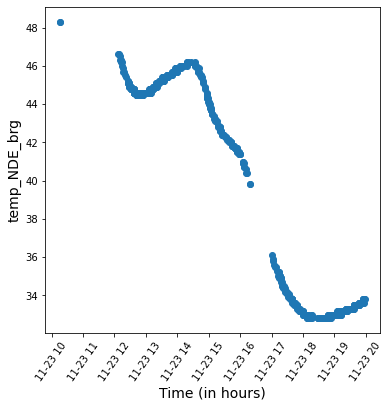

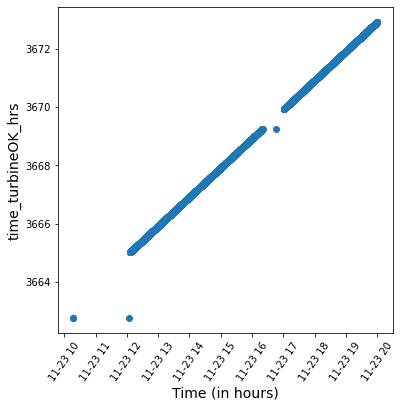

In [24]:
##Plotting the parameters for device 'WTG003'
Plotting_raw_data(df,'WTG003')

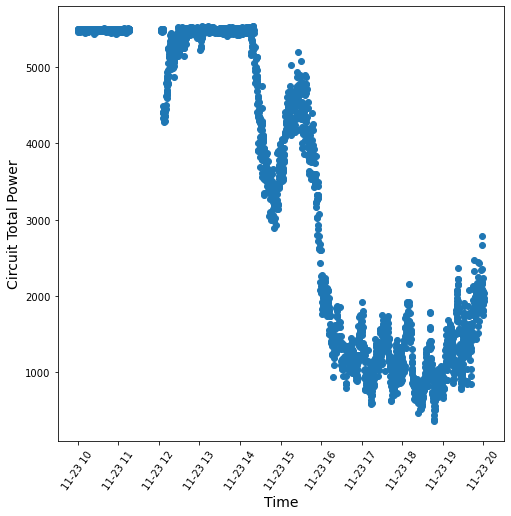

In [25]:
##Plotting for device 'SITE' directly or we can also the Plotting_raw_data function to do it
y = df[df.column_name == 'circuit_total_power'].value.astype(float)
plt.figure(1,figsize = (8,8))
plt.scatter(y.index,y)
plt.xticks(rotation=55)
plt.xlabel('Time',fontsize=14)
plt.ylabel('Circuit Total Power',fontsize=14)
plt.show()

From the precossing of the raw data of different column_names in the column_name for all the four devices, We observed that there are different parameters which are linear to the time (e.g. time_all_sec, time_all_hrs,time_turbineOP_hrs and few more) that can be easily seen in the plots above.
There are few parameters that can be ignored for the aggregation operations:
 - today_sec_failure
 - today_sec_gridstop
 - today_sec_weatherstop
 - today_sec_operatorSTOP
 - vib/Acc_X
 - vib/Acc_Y
 - mode
 - avi_stat
 - time_gridSTOP_hrs
 - system_ok
 - time_turbineFAIL_hrs
 - time_weatherSTOP_hrs
 - time_turbineSRVSTOP_hrs
 - alarm_code
 - energy_day_consumption
 - WAPC/WAPC_MODE
 - WAPC/WAPC_SP
 - alarm_string

In [26]:
##Device 'site' as there is no common parameters between 'site' and all other devices
##Do it seperately
t = df[df.column_name == 'circuit_total_power'].value.astype(float)
t = t.resample('10T').agg(['mean','max','min','std'])
t = t.interpolate()
t.columns = ['Mean','Max','Min','Std']
t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2019-11-23 10:00:00 to 2019-11-23 20:00:00
Freq: 10T
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mean    61 non-null     float64
 1   Max     61 non-null     float64
 2   Min     61 non-null     float64
 3   Std     61 non-null     float64
dtypes: float64(4)
memory usage: 2.4 KB


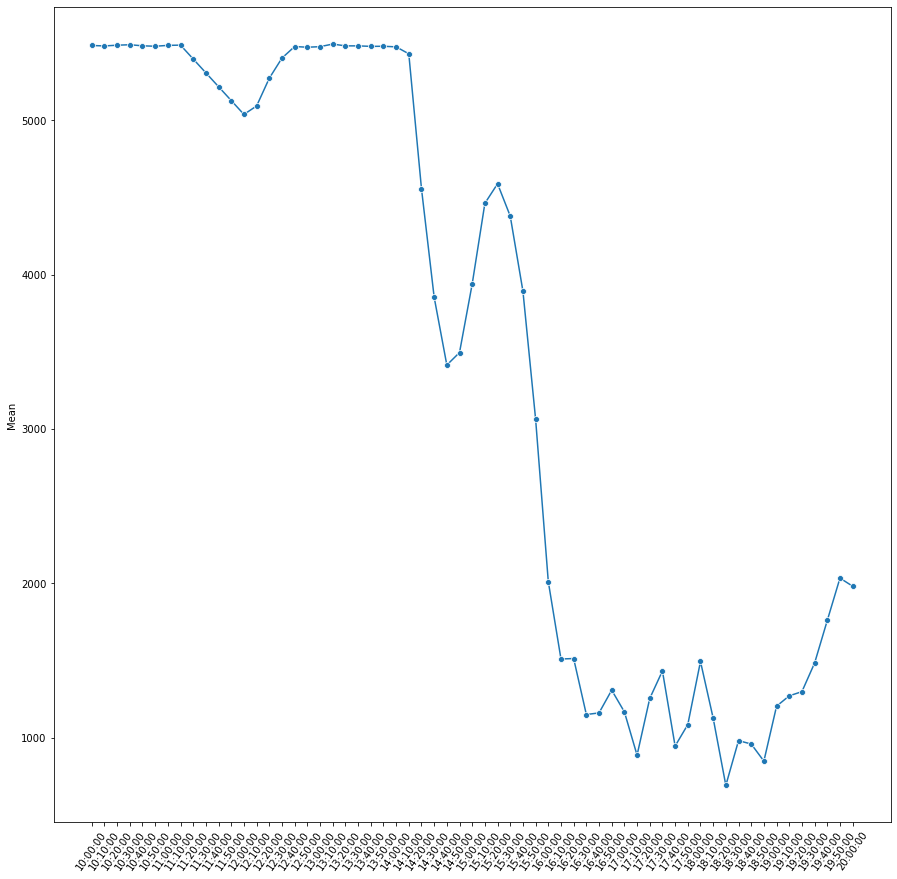

In [27]:
##Plotting the resampled aggregated data for device 'site'
time = datetime_to_time(t.index)
plt.figure(figsize = (15,15))
g = sns.lineplot(time,t['Mean'],marker='o')
g.set_xticklabels(time,rotation=55, ha = 'center')
plt.show()

In [28]:
##Function defined to process the raw data for different device and remove the columns that doesn't make sense
##and return processed_data
def Processing_column(data,device,eliminate_col):
    new_data = pd.DataFrame()
    filter_data = df[df.device == device]
    columns = filter_data.column_name.unique().tolist()
    columns.sort()
    for elim in eliminate_col:
        columns.remove(elim)
    for col in columns:
        temp = df[df.column_name == col].value.astype(float)
        temp= temp.resample('10T').agg(['mean','max','min','std'])
        temp.columns = [str(col)+'_avg',str(col)+'_std',str(col)+'_max',str(col)+'_min']
        temp.interpolate(method = 'linear') ###To fill the missing values after resampling
        #temp.interpolate(method = 'linear')
        new_data = pd.concat([new_data,temp],axis =1)
    new_data.insert(0, 'device', str(device))
    return new_data

In [29]:
##Function defined to check whether the data after resampling has missing values or not
##Return: columns with missing values
def Checking_NaN_values(data):
    columns = data.columns
    col_with_missing_value = []
    for column in columns:
        bool_series = pd.isnull(data[column])
        temp = data[bool_series]
        if temp.empty:
            pass
            #print("The column  " +  column + " has no missing values")
        else:
            print("The column " + str(column) + " has some missing values")
            col_with_missing_value.append(column)
    if len(col_with_missing_value)==0:
        print("No Missing Value")
    return col_with_missing_value

In [30]:
##Function defined to fill the missing value in the resampled data set
def filling_missing_value(data,col_with_missing_value):
    for col in col_with_missing_value:
        temp = data[col]
        temp.dropna()
        bool_series = pd.isnull(data[col])
        data.loc[bool_series,col] = temp.mean()
    return data

In [31]:
##Categorizing device 'WTG001' data
df_WTG001 = df[df.device == 'WTG001']
df_WTG001.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170603 entries, 2019-11-23 10:00:17.149000 to 2019-11-23 20:00:34.490000
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   device        170603 non-null  object
 1   timestamp     170603 non-null  int64 
 2   column_cat    170603 non-null  object
 3   column_name   170603 non-null  object
 4   value         170603 non-null  object
 5   datatype      170603 non-null  object
 6   grp_edgnodid  170603 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.4+ MB


In [32]:
## Columns to be eliminated
eliminate_col = ['alarm_string', 'today_sec_failure',
       'today_sec_gridSTOP', 'today_sec_weatherSTOP',
       'today_sec_operatorSTOP',
       'Vib/ACC_X','Vib/ACC_Y', 'mode', 'avi_stat', 'time_gridSTOP_hrs',
       'system_OK', 'time_turbineFAIL_hrs', 'time_weatherSTOP_hrs',
       'time_turbineSRVSTOP_hrs', 'alarm_code', 'energy_day_consump',
       'WAPC/WAPC_MODE', 'WAPC/WAPC_SP']

In [33]:
##Seperating Continuous Columns for device 'WTG001'
data_WTG001 = Processing_column(df,'WTG001',eliminate_col)

In [34]:
data_WTG001.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2019-11-23 10:00:00 to 2019-11-23 20:00:00
Freq: 10T
Columns: 237 entries, device to wind_speed_raw_min
dtypes: float64(236), object(1)
memory usage: 115.9+ KB


In [35]:
data_WTG001.tail()

device   COD_sec_avg  COD_sec_std  COD_sec_max  \
TimeStamp                                                             
2019-11-23 19:20:00  WTG001  1.520255e+07   15202800.0   15202201.0   
2019-11-23 19:30:00  WTG001  1.520308e+07   15203398.0   15202801.0   
2019-11-23 19:40:00  WTG001  1.520377e+07   15204000.0   15203403.0   
2019-11-23 19:50:00  WTG001  1.520423e+07   15204600.0   15204001.0   
2019-11-23 20:00:00  WTG001  1.520462e+07   15204634.0   15204605.0   

                     COD_sec_min     I_1_avg  I_1_std  I_1_max     I_1_min  \
TimeStamp                                                                    
2019-11-23 19:20:00   178.449180  405.544522   1127.4    102.8  185.281869   
2019-11-23 19:30:00   197.573831  472.874900    797.2    177.3  124.242873   
2019-11-23 19:40:00   179.043181  565.938614   1207.7    180.7  196.259311   
2019-11-23 19:50:00   194.691007  628.389820   1274.9    232.1  215.763731   
2019-11-23 20:00:00     9.587600  608.700000    899.1    358.8  175.642030   

                        I_2_avg  ...  wind_dir_max  wind_dir_min  \
TimeStamp                        ...                               
2019-11-23 19:20:00  417.241014  ...         272.0      7.293002   
2019-11-23 19:30:00  484.412549  ...         281.0      6.668521   
2019-11-23 19:40:00  587.312500  ...         271.0      7.495749   
2019-11-23 19:50:00  664.392090  ...         271.0      6.699866   
2019-11-23 20:00:00  580.330000  ...         276.0      4.389517   

                     wind_speed_avg  wind_speed_std  wind_speed_max  \
TimeStamp                                                             
2019-11-23 19:20:00        7.148903            11.4             4.5   
2019-11-23 19:30:00        7.627536             9.8             5.1   
2019-11-23 19:40:00        7.963253            11.0             4.8   
2019-11-23 19:50:00        8.219118            10.7             6.0   
2019-11-23 20:00:00        8.428571            10.2             6.5   

                     wind_speed_min  wind_speed_raw_avg  wind_speed_raw_std  \
TimeStamp                                                                     
2019-11-23 19:20:00        1.260200            7.095913                11.5   
2019-11-23 19:30:00        0.935370            7.639394                 9.8   
2019-11-23 19:40:00        1.192974            7.983981                11.0   
2019-11-23 19:50:00        1.087063            8.170455                11.1   
2019-11-23 20:00:00        1.291916            8.037500                 9.3   

                     wind_speed_raw_max  wind_speed_raw_min  
TimeStamp                                                    
2019-11-23 19:20:00                 4.3            1.218693  
2019-11-23 19:30:00                 5.3            0.908107  
2019-11-23 19:40:00                 4.8            1.210034  
2019-11-23 19:50:00                 5.2            1.208934  
2019-11-23 20:00:00                 6.5            0.986969  

[5 rows x 237 columns]

In [36]:
#Checking whether there are missing values in processed data
col_with_missing_value = Checking_NaN_values(data_WTG001)

The column panel_temp_min has some missing values
The column pitch_ang1_avg has some missing values
The column pitch_ang1_std has some missing values
The column pitch_ang1_max has some missing values
The column pitch_ang1_min has some missing values
The column pitch_ang2_avg has some missing values
The column pitch_ang2_std has some missing values
The column pitch_ang2_max has some missing values
The column pitch_ang2_min has some missing values
The column pitch_ang3_avg has some missing values
The column pitch_ang3_std has some missing values
The column pitch_ang3_max has some missing values
The column pitch_ang3_min has some missing values
The column pitch_ang_all_min has some missing values
The column pos_nacelle_avg has some missing values
The column pos_nacelle_std has some missing values
The column pos_nacelle_max has some missing values
The column pos_nacelle_min has some missing values
The column rotor_speed_avg has some missing values
The column rotor_speed_std has some missin

In [37]:
##Filling the missing value in the resampled data with mean
data_WTG001 = filling_missing_value(data_WTG001,col_with_missing_value)

In [38]:
data_WTG001.device.unique()

array(['WTG001'], dtype=object)

In [39]:
data_WTG001.tail()

device   COD_sec_avg  COD_sec_std  COD_sec_max  \
TimeStamp                                                             
2019-11-23 19:20:00  WTG001  1.520255e+07   15202800.0   15202201.0   
2019-11-23 19:30:00  WTG001  1.520308e+07   15203398.0   15202801.0   
2019-11-23 19:40:00  WTG001  1.520377e+07   15204000.0   15203403.0   
2019-11-23 19:50:00  WTG001  1.520423e+07   15204600.0   15204001.0   
2019-11-23 20:00:00  WTG001  1.520462e+07   15204634.0   15204605.0   

                     COD_sec_min     I_1_avg  I_1_std  I_1_max     I_1_min  \
TimeStamp                                                                    
2019-11-23 19:20:00   178.449180  405.544522   1127.4    102.8  185.281869   
2019-11-23 19:30:00   197.573831  472.874900    797.2    177.3  124.242873   
2019-11-23 19:40:00   179.043181  565.938614   1207.7    180.7  196.259311   
2019-11-23 19:50:00   194.691007  628.389820   1274.9    232.1  215.763731   
2019-11-23 20:00:00     9.587600  608.700000    899.1    358.8  175.642030   

                        I_2_avg  ...  wind_dir_max  wind_dir_min  \
TimeStamp                        ...                               
2019-11-23 19:20:00  417.241014  ...         272.0      7.293002   
2019-11-23 19:30:00  484.412549  ...         281.0      6.668521   
2019-11-23 19:40:00  587.312500  ...         271.0      7.495749   
2019-11-23 19:50:00  664.392090  ...         271.0      6.699866   
2019-11-23 20:00:00  580.330000  ...         276.0      4.389517   

                     wind_speed_avg  wind_speed_std  wind_speed_max  \
TimeStamp                                                             
2019-11-23 19:20:00        7.148903            11.4             4.5   
2019-11-23 19:30:00        7.627536             9.8             5.1   
2019-11-23 19:40:00        7.963253            11.0             4.8   
2019-11-23 19:50:00        8.219118            10.7             6.0   
2019-11-23 20:00:00        8.428571            10.2             6.5   

                     wind_speed_min  wind_speed_raw_avg  wind_speed_raw_std  \
TimeStamp                                                                     
2019-11-23 19:20:00        1.260200            7.095913                11.5   
2019-11-23 19:30:00        0.935370            7.639394                 9.8   
2019-11-23 19:40:00        1.192974            7.983981                11.0   
2019-11-23 19:50:00        1.087063            8.170455                11.1   
2019-11-23 20:00:00        1.291916            8.037500                 9.3   

                     wind_speed_raw_max  wind_speed_raw_min  
TimeStamp                                                    
2019-11-23 19:20:00                 4.3            1.218693  
2019-11-23 19:30:00                 5.3            0.908107  
2019-11-23 19:40:00                 4.8            1.210034  
2019-11-23 19:50:00                 5.2            1.208934  
2019-11-23 20:00:00                 6.5            0.986969  

[5 rows x 237 columns]

In [40]:
##Re-Checking to make sure there are no missing values in processed data
col_with_missing_value = Checking_NaN_values(data_WTG001)

No Missing Value


In [41]:
data_WTG001.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2019-11-23 10:00:00 to 2019-11-23 20:00:00
Freq: 10T
Columns: 237 entries, device to wind_speed_raw_min
dtypes: float64(236), object(1)
memory usage: 115.9+ KB


In [42]:
##Categorizing device 'WTG002' data
df_WTG002 = df[df.device == 'WTG002']
df_WTG002.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200445 entries, 2019-11-23 10:00:17.193000 to 2019-11-23 20:00:34.511000
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   device        200445 non-null  object
 1   timestamp     200445 non-null  int64 
 2   column_cat    200445 non-null  object
 3   column_name   200445 non-null  object
 4   value         200445 non-null  object
 5   datatype      200445 non-null  object
 6   grp_edgnodid  200445 non-null  object
dtypes: int64(1), object(6)
memory usage: 12.2+ MB


In [43]:
##Seperating Continuous Columns for device 'WTG002'
data_WTG002 = Processing_column(df,'WTG002',eliminate_col)
data_WTG002.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2019-11-23 10:00:00 to 2019-11-23 20:00:00
Freq: 10T
Columns: 237 entries, device to wind_speed_raw_min
dtypes: float64(236), object(1)
memory usage: 115.9+ KB


In [44]:
data_WTG002.head()

device   COD_sec_avg  COD_sec_std  COD_sec_max  \
TimeStamp                                                             
2019-11-23 10:00:00  WTG002  1.516892e+07   15169196.0   15168618.0   
2019-11-23 10:10:00  WTG002  1.516947e+07   15169795.0   15169201.0   
2019-11-23 10:20:00  WTG002  1.517007e+07   15170394.0   15169800.0   
2019-11-23 10:30:00  WTG002  1.517072e+07   15170997.0   15170404.0   
2019-11-23 10:40:00  WTG002  1.517134e+07   15171600.0   15171002.0   

                     COD_sec_min      I_1_avg  I_1_std  I_1_max    I_1_min  \
TimeStamp                                                                    
2019-11-23 10:00:00   156.458092  1726.414286   1762.0   1667.8  16.448412   
2019-11-23 10:10:00   145.377304  1718.001689   1766.3   1667.8  13.822032   
2019-11-23 10:20:00   165.650341  1719.213699   1750.6   1688.6  13.863605   
2019-11-23 10:30:00   154.655626  1721.007104   1748.9   1677.6  14.671536   
2019-11-23 10:40:00   189.772453  1727.270701   1767.3   1684.5  14.089295   

                         I_2_avg  ...  wind_dir_max  wind_dir_min  \
TimeStamp                         ...                               
2019-11-23 10:00:00  1742.308228  ...         228.0      4.128091   
2019-11-23 10:10:00  1734.783391  ...         222.0      4.367618   
2019-11-23 10:20:00  1733.590850  ...         234.0      4.475497   
2019-11-23 10:30:00  1735.106771  ...         239.0      3.803636   
2019-11-23 10:40:00  1744.784076  ...         240.0      3.789060   

                     wind_speed_avg  wind_speed_std  wind_speed_max  \
TimeStamp                                                             
2019-11-23 10:00:00       14.494253            16.8            13.0   
2019-11-23 10:10:00       13.532919            15.7            11.5   
2019-11-23 10:20:00       14.110127            16.2            11.3   
2019-11-23 10:30:00       15.557292            17.8            13.3   
2019-11-23 10:40:00       15.596512            17.2            13.1   

                     wind_speed_min  wind_speed_raw_avg  wind_speed_raw_std  \
TimeStamp                                                                     
2019-11-23 10:00:00        0.758266           14.351852                17.1   
2019-11-23 10:10:00        0.819891           13.431597                15.5   
2019-11-23 10:20:00        1.230238           13.795302                16.6   
2019-11-23 10:30:00        1.081981           15.278882                17.5   
2019-11-23 10:40:00        0.994272           15.298649                17.3   

                     wind_speed_raw_max  wind_speed_raw_min  
TimeStamp                                                    
2019-11-23 10:00:00                12.6            0.787955  
2019-11-23 10:10:00                11.5            0.842682  
2019-11-23 10:20:00                11.4            1.137763  
2019-11-23 10:30:00                13.2            0.948381  
2019-11-23 10:40:00                13.1            0.899886  

[5 rows x 237 columns]

In [45]:
#Checking whether there are missing values in processed data
col_with_missing_value = Checking_NaN_values(data_WTG002)

The column panel_temp_min has some missing values
The column pitch_ang1_avg has some missing values
The column pitch_ang1_std has some missing values
The column pitch_ang1_max has some missing values
The column pitch_ang1_min has some missing values
The column pitch_ang2_avg has some missing values
The column pitch_ang2_std has some missing values
The column pitch_ang2_max has some missing values
The column pitch_ang2_min has some missing values
The column pitch_ang3_avg has some missing values
The column pitch_ang3_std has some missing values
The column pitch_ang3_max has some missing values
The column pitch_ang3_min has some missing values
The column pitch_ang_all_min has some missing values
The column pos_nacelle_avg has some missing values
The column pos_nacelle_std has some missing values
The column pos_nacelle_max has some missing values
The column pos_nacelle_min has some missing values
The column rotor_speed_avg has some missing values
The column rotor_speed_std has some missin

In [46]:
##Filling the missing value in the resampled data with mean
data_WTG002 = filling_missing_value(data_WTG002,col_with_missing_value)

In [47]:
##Re-Checking to make sure there are no missing values in processed data
col_with_missing_value = Checking_NaN_values(data_WTG002)

No Missing Value


In [48]:
##Seperating Continuous Columns for device 'WTG003'
data_WTG003 = Processing_column(df,'WTG003',eliminate_col)
data_WTG003.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2019-11-23 10:00:00 to 2019-11-23 20:00:00
Freq: 10T
Columns: 237 entries, device to wind_speed_raw_min
dtypes: float64(236), object(1)
memory usage: 115.9+ KB


In [49]:
data_WTG003.head()

device   COD_sec_avg  COD_sec_std  COD_sec_max  \
TimeStamp                                                             
2019-11-23 10:00:00  WTG003  1.516892e+07   15169196.0   15168618.0   
2019-11-23 10:10:00  WTG003  1.516947e+07   15169795.0   15169201.0   
2019-11-23 10:20:00  WTG003  1.517007e+07   15170394.0   15169800.0   
2019-11-23 10:30:00  WTG003  1.517072e+07   15170997.0   15170404.0   
2019-11-23 10:40:00  WTG003  1.517134e+07   15171600.0   15171002.0   

                     COD_sec_min      I_1_avg  I_1_std  I_1_max    I_1_min  \
TimeStamp                                                                    
2019-11-23 10:00:00   156.458092  1726.414286   1762.0   1667.8  16.448412   
2019-11-23 10:10:00   145.377304  1718.001689   1766.3   1667.8  13.822032   
2019-11-23 10:20:00   165.650341  1719.213699   1750.6   1688.6  13.863605   
2019-11-23 10:30:00   154.655626  1721.007104   1748.9   1677.6  14.671536   
2019-11-23 10:40:00   189.772453  1727.270701   1767.3   1684.5  14.089295   

                         I_2_avg  ...  wind_dir_max  wind_dir_min  \
TimeStamp                         ...                               
2019-11-23 10:00:00  1742.308228  ...         228.0      4.128091   
2019-11-23 10:10:00  1734.783391  ...         222.0      4.367618   
2019-11-23 10:20:00  1733.590850  ...         234.0      4.475497   
2019-11-23 10:30:00  1735.106771  ...         239.0      3.803636   
2019-11-23 10:40:00  1744.784076  ...         240.0      3.789060   

                     wind_speed_avg  wind_speed_std  wind_speed_max  \
TimeStamp                                                             
2019-11-23 10:00:00       14.494253            16.8            13.0   
2019-11-23 10:10:00       13.532919            15.7            11.5   
2019-11-23 10:20:00       14.110127            16.2            11.3   
2019-11-23 10:30:00       15.557292            17.8            13.3   
2019-11-23 10:40:00       15.596512            17.2            13.1   

                     wind_speed_min  wind_speed_raw_avg  wind_speed_raw_std  \
TimeStamp                                                                     
2019-11-23 10:00:00        0.758266           14.351852                17.1   
2019-11-23 10:10:00        0.819891           13.431597                15.5   
2019-11-23 10:20:00        1.230238           13.795302                16.6   
2019-11-23 10:30:00        1.081981           15.278882                17.5   
2019-11-23 10:40:00        0.994272           15.298649                17.3   

                     wind_speed_raw_max  wind_speed_raw_min  
TimeStamp                                                    
2019-11-23 10:00:00                12.6            0.787955  
2019-11-23 10:10:00                11.5            0.842682  
2019-11-23 10:20:00                11.4            1.137763  
2019-11-23 10:30:00                13.2            0.948381  
2019-11-23 10:40:00                13.1            0.899886  

[5 rows x 237 columns]

In [50]:
#Checking whether there are missing values in processed data
col_with_missing_value = Checking_NaN_values(data_WTG003)

The column panel_temp_min has some missing values
The column pitch_ang1_avg has some missing values
The column pitch_ang1_std has some missing values
The column pitch_ang1_max has some missing values
The column pitch_ang1_min has some missing values
The column pitch_ang2_avg has some missing values
The column pitch_ang2_std has some missing values
The column pitch_ang2_max has some missing values
The column pitch_ang2_min has some missing values
The column pitch_ang3_avg has some missing values
The column pitch_ang3_std has some missing values
The column pitch_ang3_max has some missing values
The column pitch_ang3_min has some missing values
The column pitch_ang_all_min has some missing values
The column pos_nacelle_avg has some missing values
The column pos_nacelle_std has some missing values
The column pos_nacelle_max has some missing values
The column pos_nacelle_min has some missing values
The column rotor_speed_avg has some missing values
The column rotor_speed_std has some missin

In [51]:
##Filling the missing value in the resampled data with mean
data_WTG003 = filling_missing_value(data_WTG003,col_with_missing_value)

In [52]:
##Re-Checking to make sure there are no missing values in processed data
col_with_missing_value = Checking_NaN_values(data_WTG003)

No Missing Value


In [53]:
##Concatenating devices 'GTW001','GTW002','GTW003'
new_data_set = pd.concat([data_WTG001,data_WTG002,data_WTG003],axis = 0)
new_data_set.device.unique()

array(['WTG001', 'WTG002', 'WTG003'], dtype=object)

In [54]:
new_data_set.head()

device   COD_sec_avg  COD_sec_std  COD_sec_max  \
TimeStamp                                                             
2019-11-23 10:00:00  WTG001  1.516892e+07   15169196.0   15168618.0   
2019-11-23 10:10:00  WTG001  1.516947e+07   15169795.0   15169201.0   
2019-11-23 10:20:00  WTG001  1.517007e+07   15170394.0   15169800.0   
2019-11-23 10:30:00  WTG001  1.517072e+07   15170997.0   15170404.0   
2019-11-23 10:40:00  WTG001  1.517134e+07   15171600.0   15171002.0   

                     COD_sec_min      I_1_avg  I_1_std  I_1_max    I_1_min  \
TimeStamp                                                                    
2019-11-23 10:00:00   156.458092  1726.414286   1762.0   1667.8  16.448412   
2019-11-23 10:10:00   145.377304  1718.001689   1766.3   1667.8  13.822032   
2019-11-23 10:20:00   165.650341  1719.213699   1750.6   1688.6  13.863605   
2019-11-23 10:30:00   154.655626  1721.007104   1748.9   1677.6  14.671536   
2019-11-23 10:40:00   189.772453  1727.270701   1767.3   1684.5  14.089295   

                         I_2_avg  ...  wind_dir_max  wind_dir_min  \
TimeStamp                         ...                               
2019-11-23 10:00:00  1742.308228  ...         228.0      4.128091   
2019-11-23 10:10:00  1734.783391  ...         222.0      4.367618   
2019-11-23 10:20:00  1733.590850  ...         234.0      4.475497   
2019-11-23 10:30:00  1735.106771  ...         239.0      3.803636   
2019-11-23 10:40:00  1744.784076  ...         240.0      3.789060   

                     wind_speed_avg  wind_speed_std  wind_speed_max  \
TimeStamp                                                             
2019-11-23 10:00:00       14.494253            16.8            13.0   
2019-11-23 10:10:00       13.532919            15.7            11.5   
2019-11-23 10:20:00       14.110127            16.2            11.3   
2019-11-23 10:30:00       15.557292            17.8            13.3   
2019-11-23 10:40:00       15.596512            17.2            13.1   

                     wind_speed_min  wind_speed_raw_avg  wind_speed_raw_std  \
TimeStamp                                                                     
2019-11-23 10:00:00        0.758266           14.351852                17.1   
2019-11-23 10:10:00        0.819891           13.431597                15.5   
2019-11-23 10:20:00        1.230238           13.795302                16.6   
2019-11-23 10:30:00        1.081981           15.278882                17.5   
2019-11-23 10:40:00        0.994272           15.298649                17.3   

                     wind_speed_raw_max  wind_speed_raw_min  
TimeStamp                                                    
2019-11-23 10:00:00                12.6            0.787955  
2019-11-23 10:10:00                11.5            0.842682  
2019-11-23 10:20:00                11.4            1.137763  
2019-11-23 10:30:00                13.2            0.948381  
2019-11-23 10:40:00                13.1            0.899886  

[5 rows x 237 columns]

In [55]:
new_data_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2019-11-23 10:00:00 to 2019-11-23 20:00:00
Columns: 237 entries, device to wind_speed_raw_min
dtypes: float64(236), object(1)
memory usage: 340.3+ KB


In [56]:
##PlottingFunction for processed concatenated dataset
def PlottingFunction(data,device,col):
    t = data[data.device == device]
    time = datetime_to_time(t.index)
    plt.figure(figsize = (15,15))
    g = sns.scatterplot(time,t[col])
    g.set_xticklabels(time,rotation=55, ha = 'center')
    g.set(xlabel='Time(with frequency 10 min)',ylabel=str(col))
    plt.show()

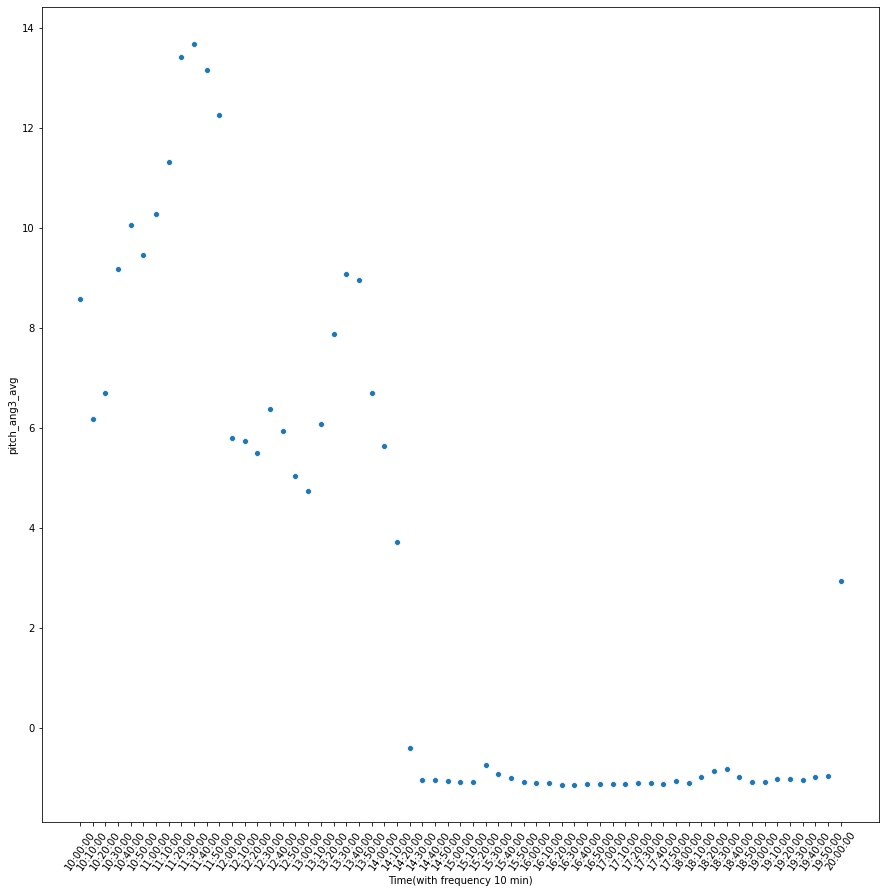

In [57]:
PlottingFunction(new_data_set,'WTG001','pitch_ang3_avg')

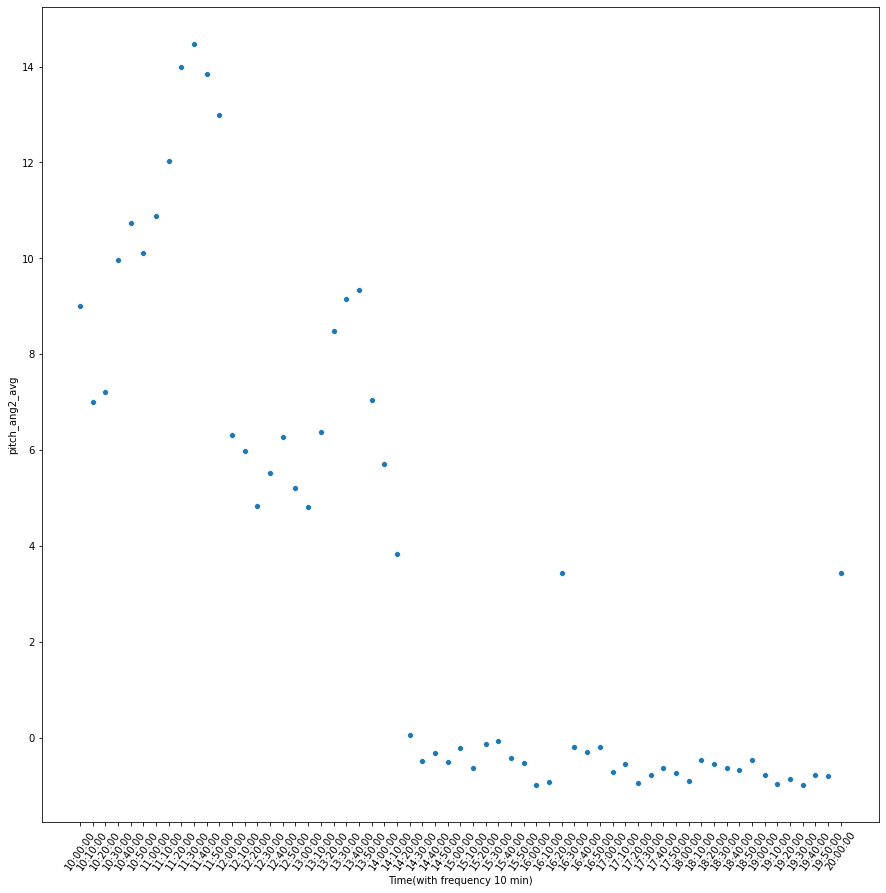

In [58]:
PlottingFunction(new_data_set,'WTG001','pitch_ang2_avg')

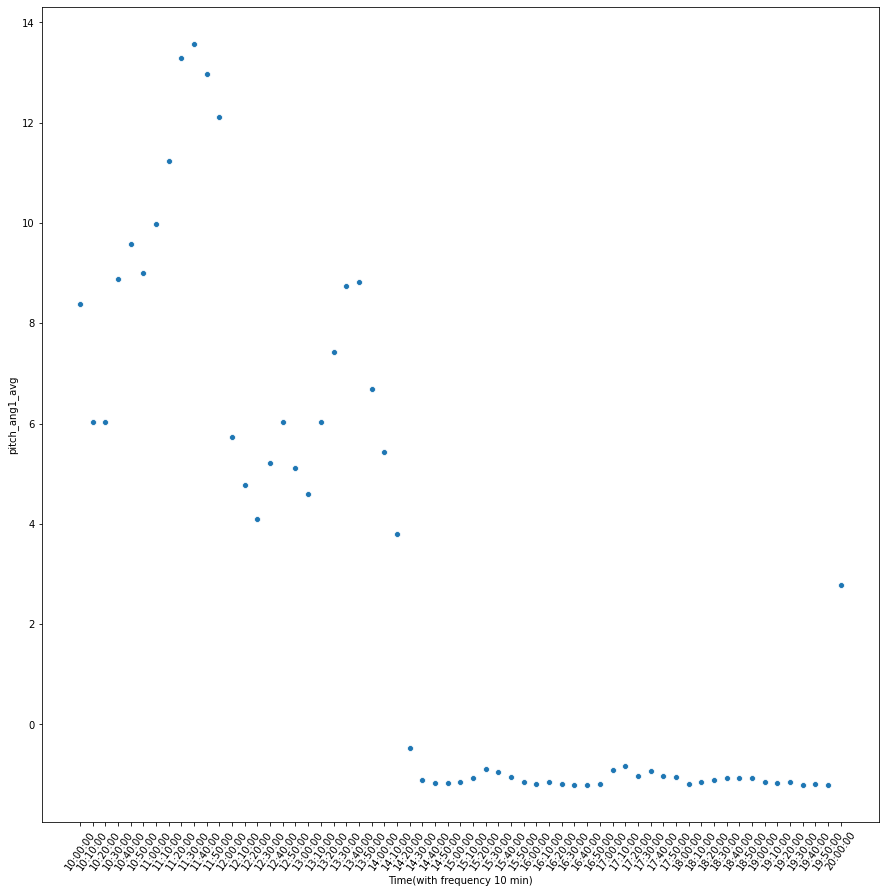

In [59]:
PlottingFunction(new_data_set,'WTG001','pitch_ang1_avg')